<a href="https://colab.research.google.com/github/sacortesro/Data-Science/blob/main/Airbnb_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estudiantes:

*   Santiago Cortés Romero
*   Oscar Julián Tinjaca Reyes
*   Andrés Santiago Jiménez Guzmán


# Estructura Proyecto

In [ ]:
#Importar librerías
from scipy import stats
from folium.plugins import FastMarkerCluster
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import folium
import statsmodels.api as sm
import plotly
import plotly.graph_objs as go
import plotly.express as px
sns.set_theme('notebook')
%matplotlib inline
plt.rcParams['figure.dpi'] = 110



In [ ]:
#TEST_CELL
!python --version
!pip install -U plotly
!pip install -U kaleido
!pip install seaborn --upgrade
!pip install folium
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('SciPy', scipy.__version__)
print('statsmodels', sm.__version__)
print(f'Plotly: {plotly.__version__}')

Python 3.9.16
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Pandas 1.4.4
NumPy 1.22.4
Matplotlib 3.7.1
SciPy 1.10.1
statsmodels 0.13.5
Plotly: 5.13.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Descripción del dataset

Datos de Airbnb para más de 250 000 listados en 10 ciudades importantes, incluida información sobre anfitriones, precios, ubicación y tipo de habitación, junto con más de 5 millones de reseñas históricas.

Link:https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews


## Problema
------

A medida que transcurre el tiempo, Airbnb se ha convertido en un fenómeno global que acapara la atención en el mercado de alquiler de viviendas. En muchos casos, los propietarios de las viviendas prefieren alquilarlas por días en lugar de tener un arrendatario fijo debido a que esto genera mayores beneficios económicos.

En este proyecto, se abordará la siguiente pregunta problema: ¿Cuáles son las características más importantes que una vivienda y su anfitrión deben tener para maximizar su rentabilidad?

Para responder a esta pregunta, se llevará a cabo un estudio utilizando un conjunto de datos disponible en este [enlace](https://www.kaggle.com/datasets/mysarahmadbhat/airbnb-listings-reviews). Los resultados de este estudio serán útiles para todas aquellas personas interesadas en comprar una vivienda para ponerla en alquiler.

## Objetivos

### General:

El objetivo de este proyecto es determinar las características necesarias que debe poseer una vivienda para tener éxito en Airbnb.

### Específicos:
* Analizar el comportamiento de alquiler de viviendas año a año para entender la tendencia del mercado.
* Identificar las características interiores de las viviendas que las hacen más atractivas para los huéspedes.
* Encontrar la mejor ubicación, tanto en términos de ciudad como de barrio, para poner una vivienda en renta.
* Investigar si hay características específicas de los anfitriones que influyen en la demanda de las viviendas que ponen en alquiler.
* Validar si existe una correlación significativa entre las calificaciones de los huéspedes y el número de reseñas realizadas en Airbnb, para determinar si las calificaciones recibidas influyen en la popularidad y demanda de una vivienda.

El cumplimiento de estos objetivos permitirá obtener información útil para los propietarios de viviendas que desean maximizar la rentabilidad de sus propiedades en Airbnb, al mismo tiempo que se satisfacen las necesidades y expectativas de los huéspedes.

## Hipótesis (cientifica o estadística)

Las viviendas que cumplen con ciertas características interiores, se ubican en ciertas ciudades y barrios, son administradas por anfitriones con ciertas características, y reciben calificaciones positivas de los huéspedes, tendrán una mayor tasa de reservas y, por lo tanto, una mayor rentabilidad en Airbnb

## **0.  Leer el archivo de datos**

In [ ]:
df_listings = pd.read_csv('/content/drive/Shareddrives/Diplomado ML/Airbnb Data/Listings.csv', encoding= 'unicode_escape')

<ipython-input-581-f87df5c4333b>:1: DtypeWarning:

Columns (5,13) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
df_listings.head()

listing_id  ... instant_bookable
0      281420  ...                f
1     3705183  ...                f
2     4082273  ...                f
3     4797344  ...                f
4     4823489  ...                f

[5 rows x 33 columns]

In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279539 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

In [ ]:
df_reviews= pd.read_csv('/content/drive/Shareddrives/Diplomado ML/Airbnb Data/Reviews.csv', encoding= 'unicode_escape')

In [ ]:
df_reviews.head()

listing_id  review_id        date  reviewer_id
0       11798  330265172  2018-09-30     11863072
1       15383  330103585  2018-09-30     39147453
2       16455  329985788  2018-09-30      1125378
3       17919  330016899  2018-09-30    172717984
4       26827  329995638  2018-09-30     17542859

# 1. Entendimiento de los datos

<Axes: >

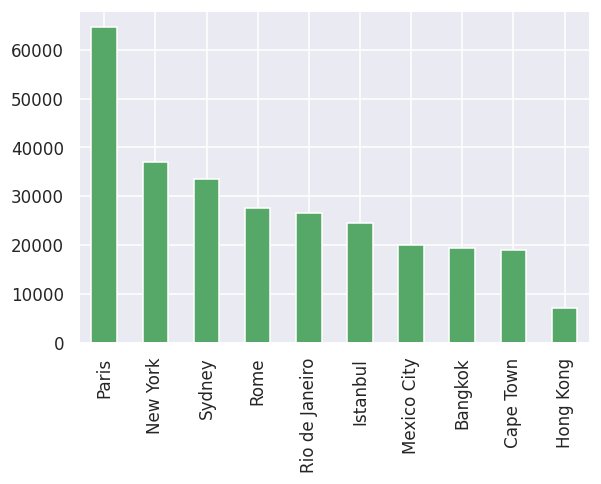

In [ ]:
df_listings['city'].value_counts().plot.bar(color='g')

**Debido al alcance del análisis y a que las características de cada ciudad varían en gran manera y el análisis se extendería a multiples variables para tener en cuenta las particularidades de cada ciudad, se ha decidido hacer el análisis sólamente sobre dos ciudades que por posición geográfica y relevancia se supone muy similares: París Y Roma.**

Se observa que tienen cantidades de datos suficientes para realizar el análsis sobre estas dos.

In [ ]:
df_listings = df_listings.loc[(df_listings['city'] == 'Paris') |  (df_listings['city'] == 'Rome')]

## **1.1 Análisis exploratorio de las características y visualización de los datos**



Para realizar el análisis exploratorio sobre los datos que se ha decidio utilizar se filtran las ciudades en este punto.

Se realiza la integración de los datos relevantes de ambos dataframes en el **df_listings**. Se agrega una columna que cuenta el número de veces reservado para cada Airbnb listado en la columna **review_counts** y las fechas mediante la columna **date**

In [ ]:
reviews_count = df_reviews.value_counts('listing_id')
reviews_count.name = 'review_counts'
df_listings = pd.merge(df_listings, reviews_count, on='listing_id', how='left')

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5373143 entries, 0 to 5373142
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   listing_id   int64 
 1   review_id    int64 
 2   date         object
 3   reviewer_id  int64 
dtypes: int64(3), object(1)
memory usage: 164.0+ MB


In [ ]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 92337 entries, 0 to 92336
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   listing_id                   92337 non-null  int64  
 1   name                         92267 non-null  object 
 2   host_id                      92337 non-null  int64  
 3   host_since                   92293 non-null  object 
 4   host_location                92110 non-null  object 
 5   host_response_time           39591 non-null  object 
 6   host_response_rate           39591 non-null  float64
 7   host_acceptance_rate         51452 non-null  float64
 8   host_is_superhost            92293 non-null  object 
 9   host_total_listings_count    92293 non-null  float64
 10  host_has_profile_pic         92293 non-null  object 
 11  host_identity_verified       92293 non-null  object 
 12  neighbourhood                92337 non-null  object 
 13  district        

### 1.1.1 Datos categóricos

> De los datos no numéricos y tenemos:

>*   host_is_superhost
>*   host_has_profile_pic
>*   host_identity_verified
>*   neighbourhood
>* city
>* property_type
>* room_type
>* amenities

> Acá se analiza teniendo en cuenta la cantidad de datos que hay de cada categoría

> Las siguientes tienen datos categóricos que indicas si son **SUPERHOST**, **TIENEN FOTO DE PERFIL** y si **ESTÁN VERIFICADOS**.

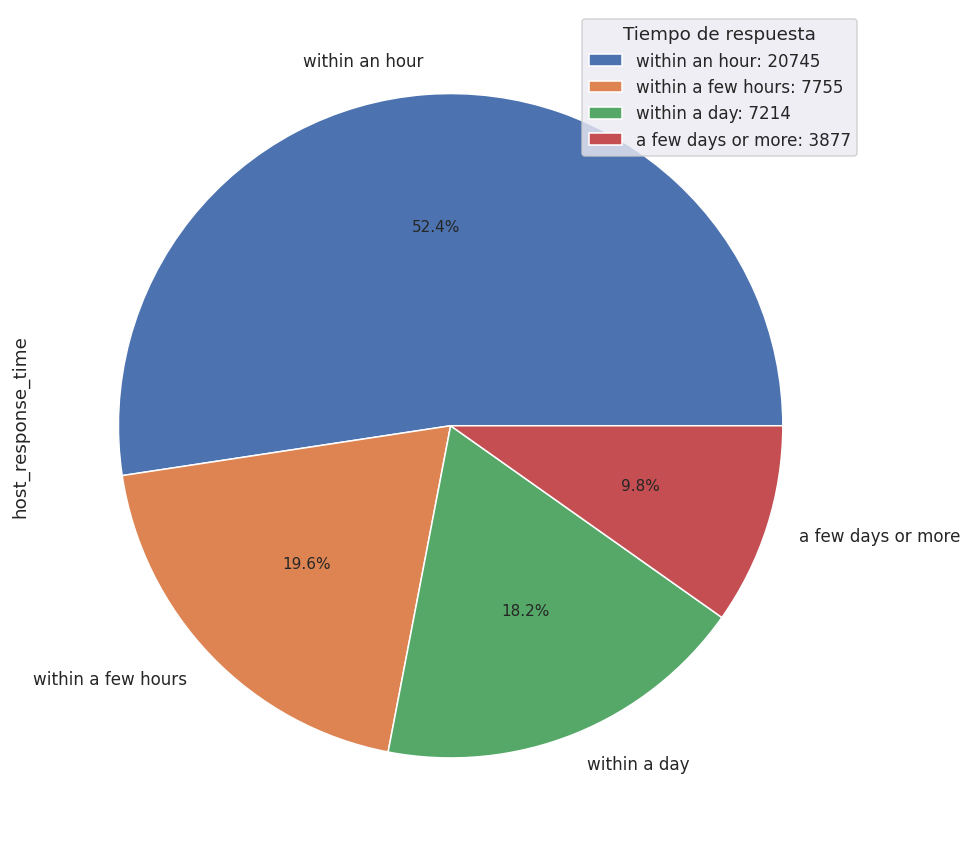

In [ ]:
host_response_time = df_listings['host_response_time'].value_counts()
host_response_time.plot.pie(autopct='%1.1f%%', figsize=(10,10));
legend_labels = [f'{index}: {count}' for index, count in host_response_time.items()]
plt.legend(labels=legend_labels, title='Tiempo de respuesta', loc='upper right')

In [ ]:
colors = {'t':'dodgerblue','f':'tomato'}

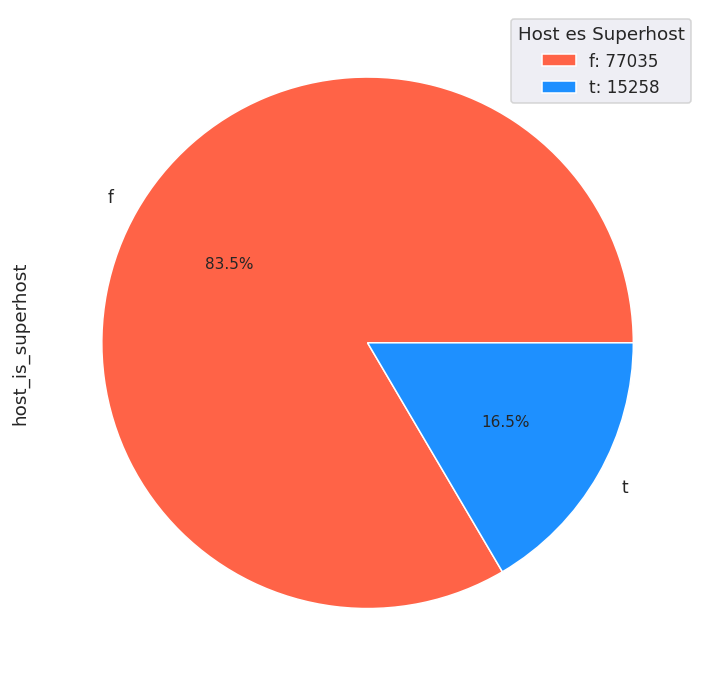

In [ ]:
superhost_count = df_listings['host_is_superhost'].value_counts()
superhost_count.plot.pie(autopct='%1.1f%%', labels = superhost_count.index, colors=[colors[label] for label in superhost_count.index], figsize=(8,8));
legend_labels = [f'{index}: {count}' for index, count in superhost_count.items()]
plt.legend(labels=legend_labels, title='Host es Superhost', loc='upper right')

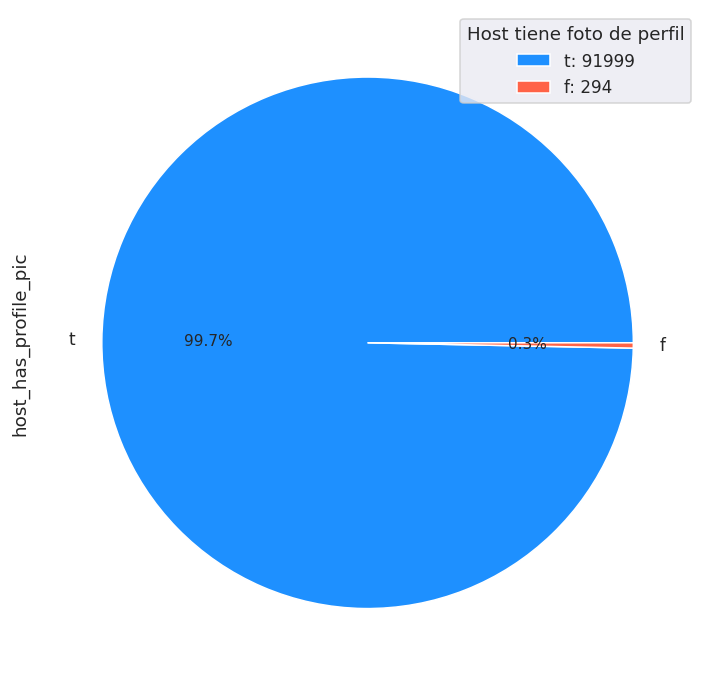

In [ ]:
profile_pic_count = df_listings['host_has_profile_pic'].value_counts()
profile_pic_count.plot.pie(autopct='%1.1f%%', labels = profile_pic_count.index, colors=[colors[label] for label in profile_pic_count.index], figsize=(8,8));
legend_labels = [f'{index}: {count}' for index, count in profile_pic_count.items()]
plt.legend(labels=legend_labels, title='Host tiene foto de perfil', loc='upper right')

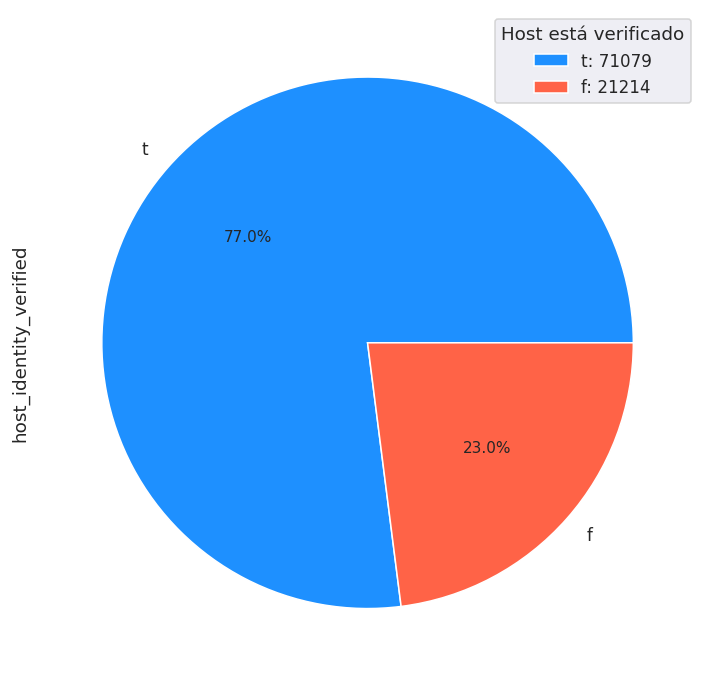

In [ ]:
verified_count = df_listings['host_identity_verified'].value_counts()
verified_count.plot.pie(autopct='%1.1f%%', labels = verified_count.index, colors=[colors[label] for label in verified_count.index], figsize=(8,8));
legend_labels = [f'{index}: {count}' for index, count in verified_count.items()]
plt.legend(labels=legend_labels, title='Host está verificado', loc='upper right')

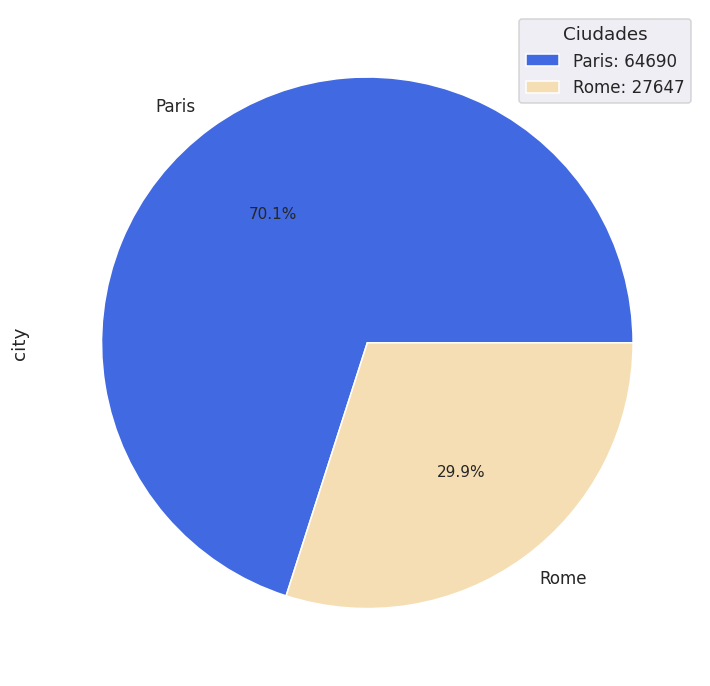

In [ ]:
color_cities = {'Paris':'royalblue','Rome':'wheat'}
cities_count = df_listings['city'].value_counts()
cities_count.plot.pie(autopct='%1.1f%%', labels = cities_count.index, colors=[color_cities[label] for label in cities_count.index], figsize=(8,8));
legend_labels = [f'{index}: {count}' for index, count in cities_count.items()]
plt.legend(labels=legend_labels, title='Ciudades', loc='upper right')

> > Se encuentran los siguientes **BARRIOS** por ciudad:




<Axes: title={'center': 'Rome'}, xlabel='neighbourhood'>

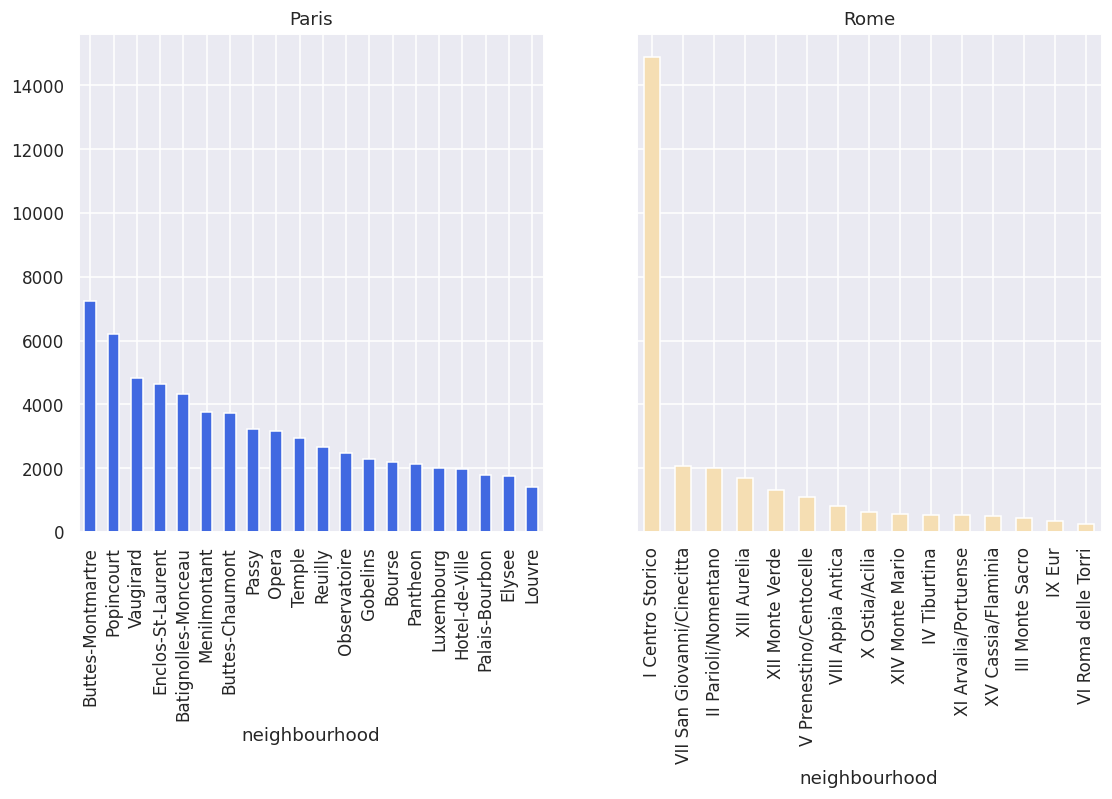

In [ ]:
fig_neighbourhood, axes = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(12,6))
neighbourhood = df_listings.groupby('city')['neighbourhood'].value_counts()
neighbourhood['Paris'].plot.bar(ax=axes[0], title='Paris', color=color_cities['Paris'])
neighbourhood['Rome'].plot.bar(ax=axes[1], title='Rome', color=color_cities['Rome'])

> De las características de cada propiedad se comprenden las siguientes categorías:

>> **TIPO DE PROPIEDAD**

>> Los datos son mostrado en esala logarítmica para facilitar visualización

>> En este caso se pueden observar que algunas propiedades tienen muy pocos datos, además llegan a estar registradas como hoteles, lugares en botes, castillos, etc. Categorías que para este análisis no llegarán a ser relevantes.

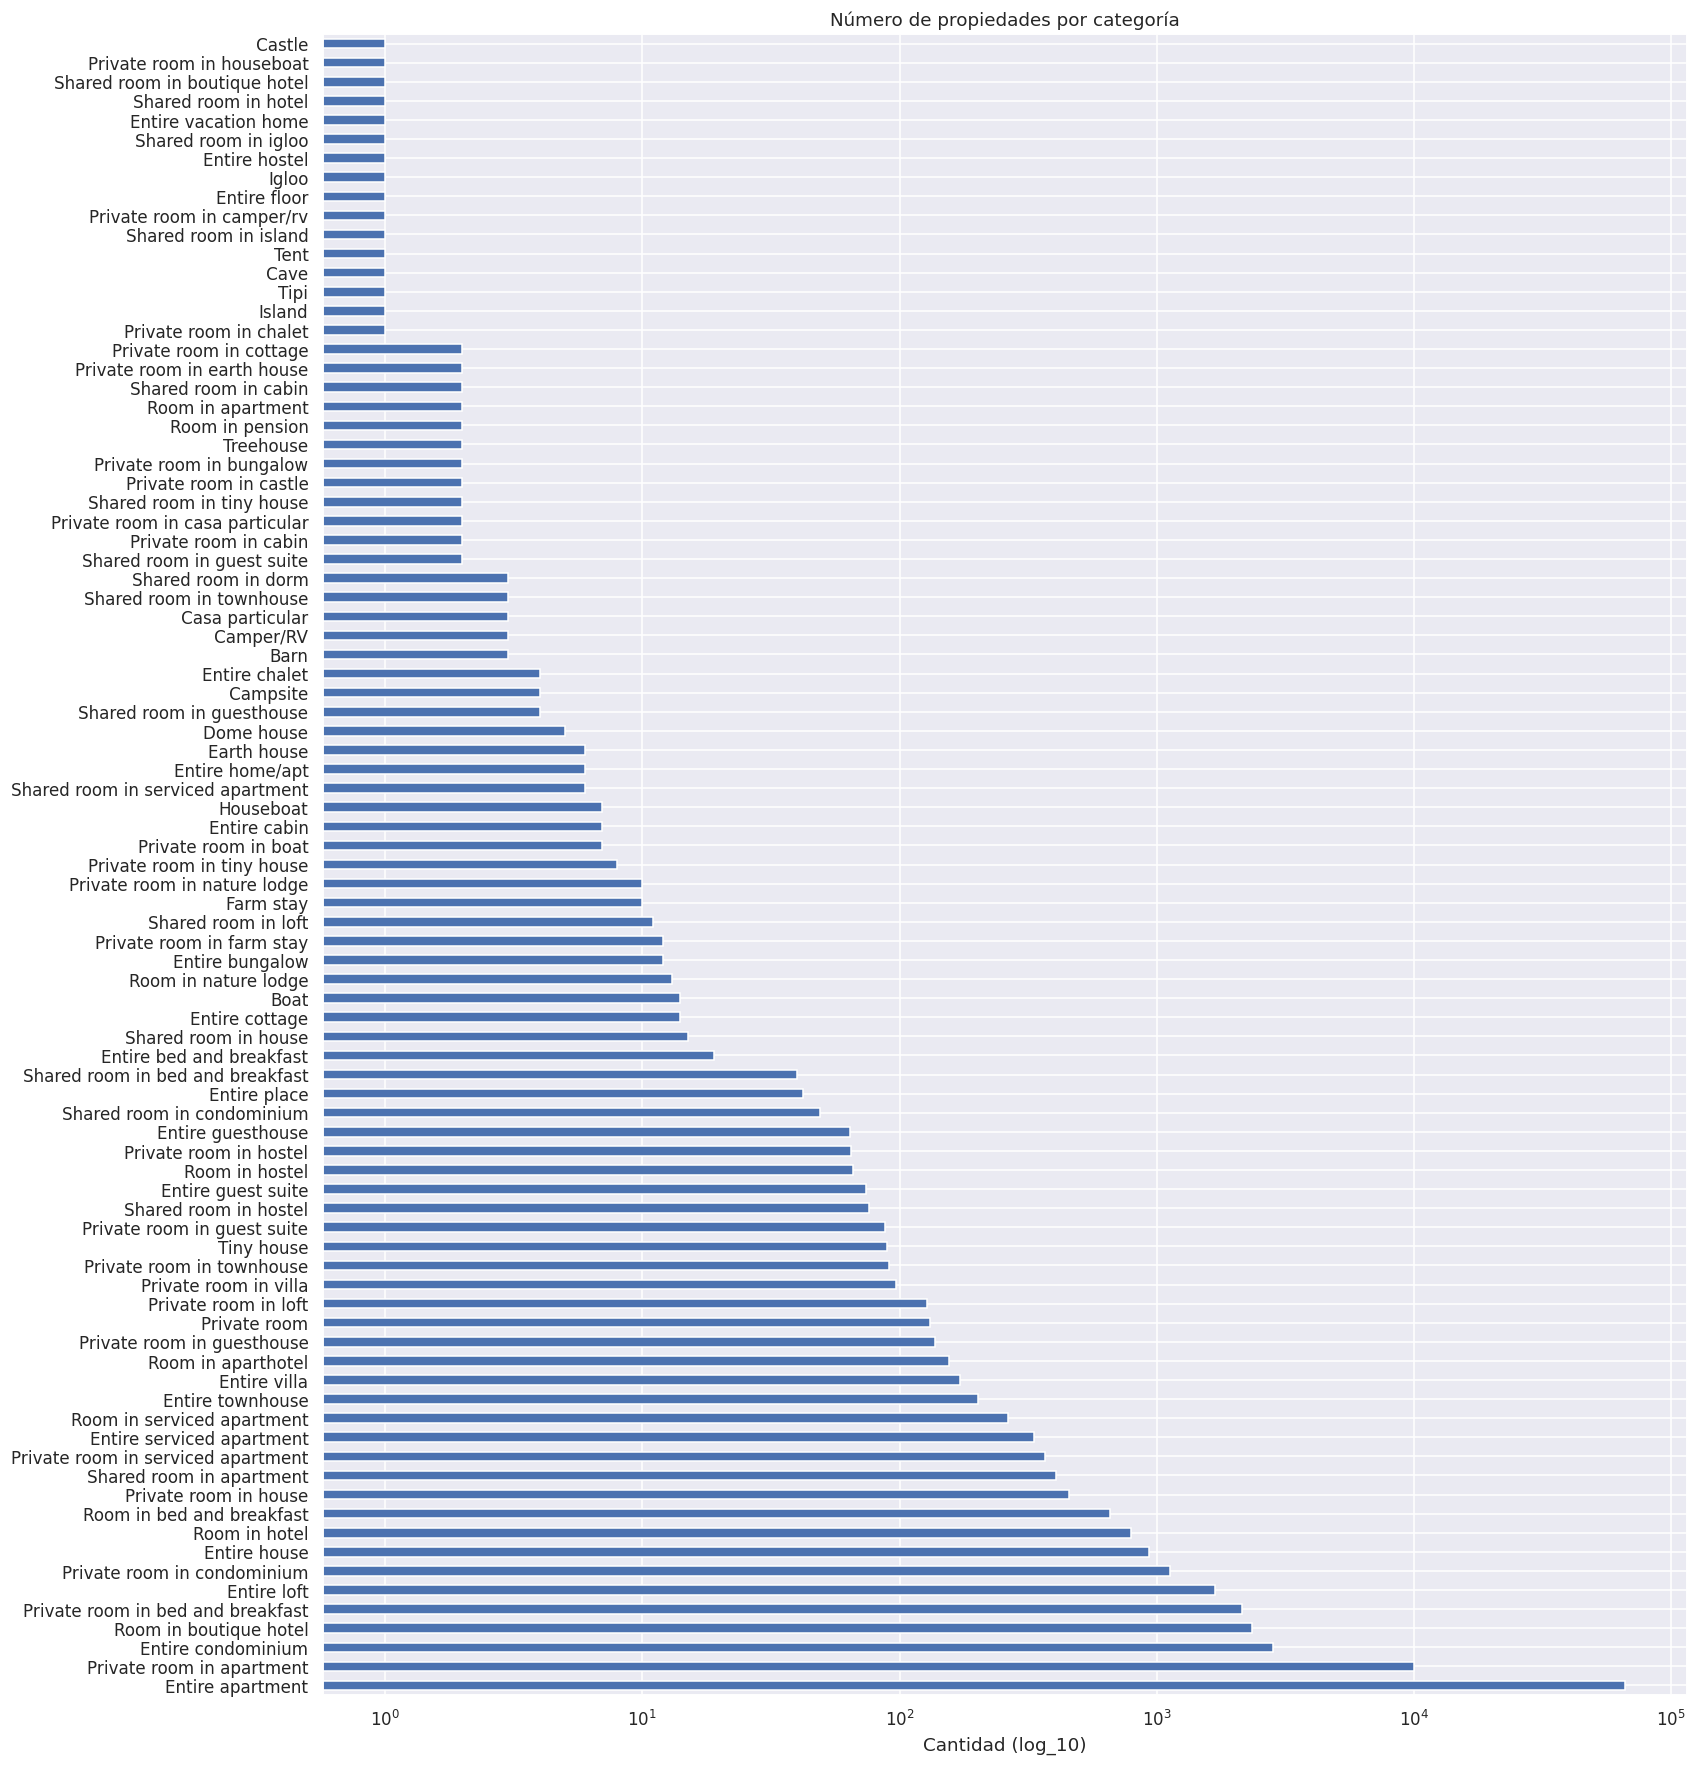

In [ ]:
ax = df_listings['property_type'].value_counts().plot.barh(figsize=(16,20), title='Número de propiedades por categoría')
ax.set_xscale('log')
ax.set_xlabel('Cantidad (log_10)')
ax.grid(True)

>> **TIPO DE HABITACIÓN**

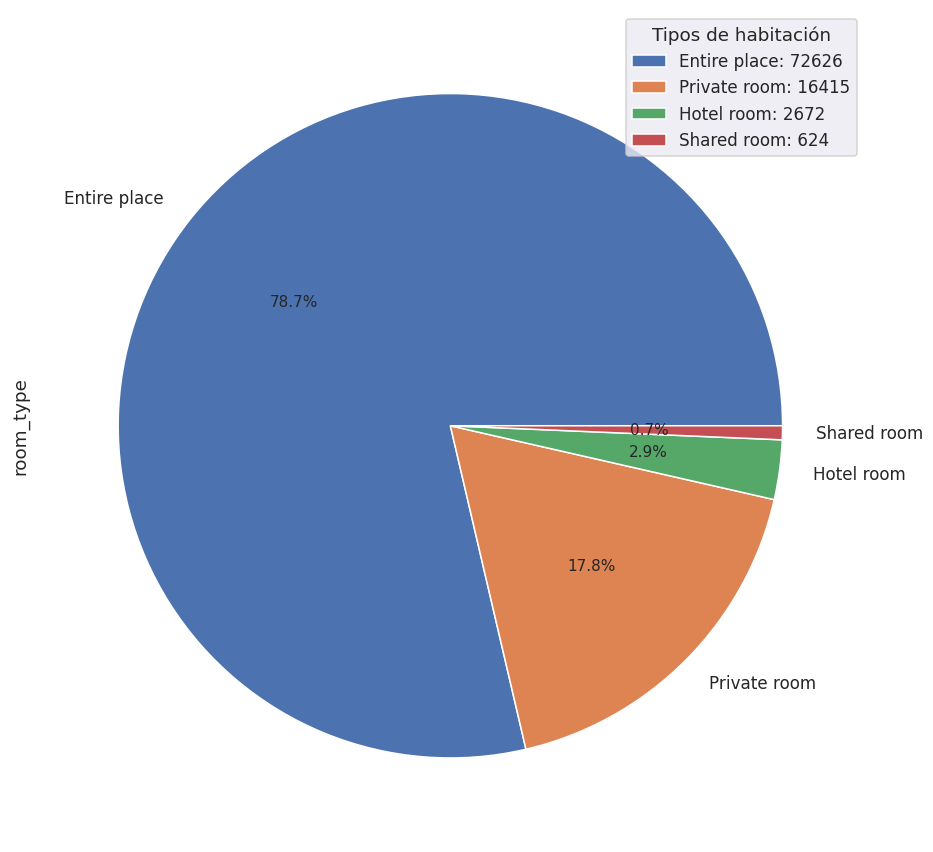

In [ ]:
room_types = df_listings['room_type'].value_counts()
room_types.plot.pie(autopct='%1.1f%%', figsize=(10,10));
legend_labels = [f'{index}: {count}' for index, count in room_types.items()]
plt.legend(labels=legend_labels, title='Tipos de habitación', loc='upper right')

>> **SERVICIOS**

>> En esta se presentan todos los servicios disponibles que presentan en Airbnb, presentan múltiples datos diferentes en forma de array en fomato JSON. Hubo un error al ingresar los datos y algunos presentan errores errores, debido a que su naturaleza (categórica y gran variedad) es necesaria, por lo tanto requiere un tratemiento especial en la preparación de los datos.

In [ ]:
df_listings['amenities'][0]

'["Heating", "Kitchen", "Washer", "Wifi", "Long term stays allowed"]'

### 1.1.2 Datos No categóricos

>De estos se puede hacer un análisis con ayuda del método *df.describe()* para identificar de mejor manera las características de los datos.

>Las categorías **listing_id**,	**host_id**	 representan datos númericos, pero son id de usuarios y Aribnb

In [ ]:
df_listings.describe()

listing_id         host_id  ...  review_scores_value  review_counts
count    92337.00000     92337.00000  ...          68783.00000    70433.00000
mean  23812179.62794  90249780.88801  ...              9.30912       33.03973
std   14371027.00026 104752378.91967  ...              0.92701       57.36104
min       2577.00000      1822.00000  ...              2.00000        1.00000
25%   11136035.00000  12795801.00000  ...              9.00000        3.00000
50%   23426079.00000  39229535.00000  ...              9.00000       11.00000
75%   36865930.00000 141291931.00000  ...             10.00000       35.00000
max   48118232.00000 387999416.00000  ...             10.00000      891.00000

[8 rows x 20 columns]

> Aquí se observa que se publica en promedio habitaciones para 3.248990 personas con STD de 1.816363, pero se publican lugares con 1.411663	habitaciones de promedio con STD de 0.936228. Lo que podría indicar que en espacios buscan acomodar la máxima cantidad de personas.

>El el comportamiento de las reseñas se identifican promedios por encima de 9 en todos los casos y STD alrededor de 1. Observando que en todos los casos se tienen puntajes de 10 desde el segundo cuartil. Lo que indica que la mayoría de las reseñas son positivas. Sin embargo, no todos los lugares tienen reseñas, por lo que habrá que analizar la naturaleza de estas más a fondo.

>En esta tabla se identifican que los campos *host_total_listings_count*, *price*,*minimum_nights*, *maximum_nights*  tienen desviaciones estándar altas y separaciones entre tercer cuartíl que podrían indicar datos atípicos, por lo que requieren un mayor análisis.

>Según la descripción de la columna y la cantidad de datos por columna, se puede observar que las columnas *'district'* al estar vacía y *‘instant_bookable’* al ser variable, serán irrelevantes para este análisis de datos.

> #### 1.1.2.1 Correlaciones

>> Las reviews peresentan correlación entre sí

>> Por fuera de los casos señalados, en la tabla de correlaciones no se puede identificar un caso de especial interés entre dos variables que parezcan estar *interrelacionadas*.



In [ ]:
df_listings.corr()

listing_id  ...  review_counts
listing_id                      1.00000  ...       -0.34606
host_id                         0.56022  ...       -0.16170
host_response_rate             -0.03957  ...        0.10825
host_acceptance_rate            0.07304  ...        0.14549
host_total_listings_count       0.07327  ...       -0.03276
latitude                        0.04523  ...       -0.22268
longitude                      -0.04543  ...        0.22274
accommodates                   -0.01537  ...        0.06307
bedrooms                       -0.01353  ...        0.01387
price                           0.03618  ...       -0.01956
minimum_nights                 -0.01728  ...       -0.01069
maximum_nights                 -0.00449  ...        0.00972
review_scores_rating           -0.02260  ...        0.05571
review_scores_accuracy         -0.03827  ...        0.07849
review_scores_cleanliness      -0.04108  ...        0.08983
review_scores_checkin          -0.07656  ...        0.08299
review_scores_communication    -0.06706  ...        0.07145
review_scores_location          0.06561  ...        0.08299
review_scores_value            -0.04195  ...        0.05639
review_counts                  -0.34606  ...        1.00000

[20 rows x 20 columns]

## 1.2 Visualizaciónes

###Histogramas de datos

>>Las visualizaciones se presentan en una escala logarítmica para facilitar la visualización de los datos.

>>De las diferentes distribuciones, podemos observar que:

>>- Hay anuncios de Airbnb con más de 10 habitaciones que requieren un análisis más detallado.
>>- Hay anfitriones con cerca de 7000 anuncios de Airbnb que pueden ser clasificados como valores atípicos.
>>- El número mínimo y máximo de noches muestra la presencia de valores atípicos.
>>- Hay anuncios que registran cero huéspedes, lo que se considera un valor atípico.
>>- Todas las distribuciones tienen sus modas en el rango inferior de datos.

Text(0, 0.5, 'Cantidad (log_10)')

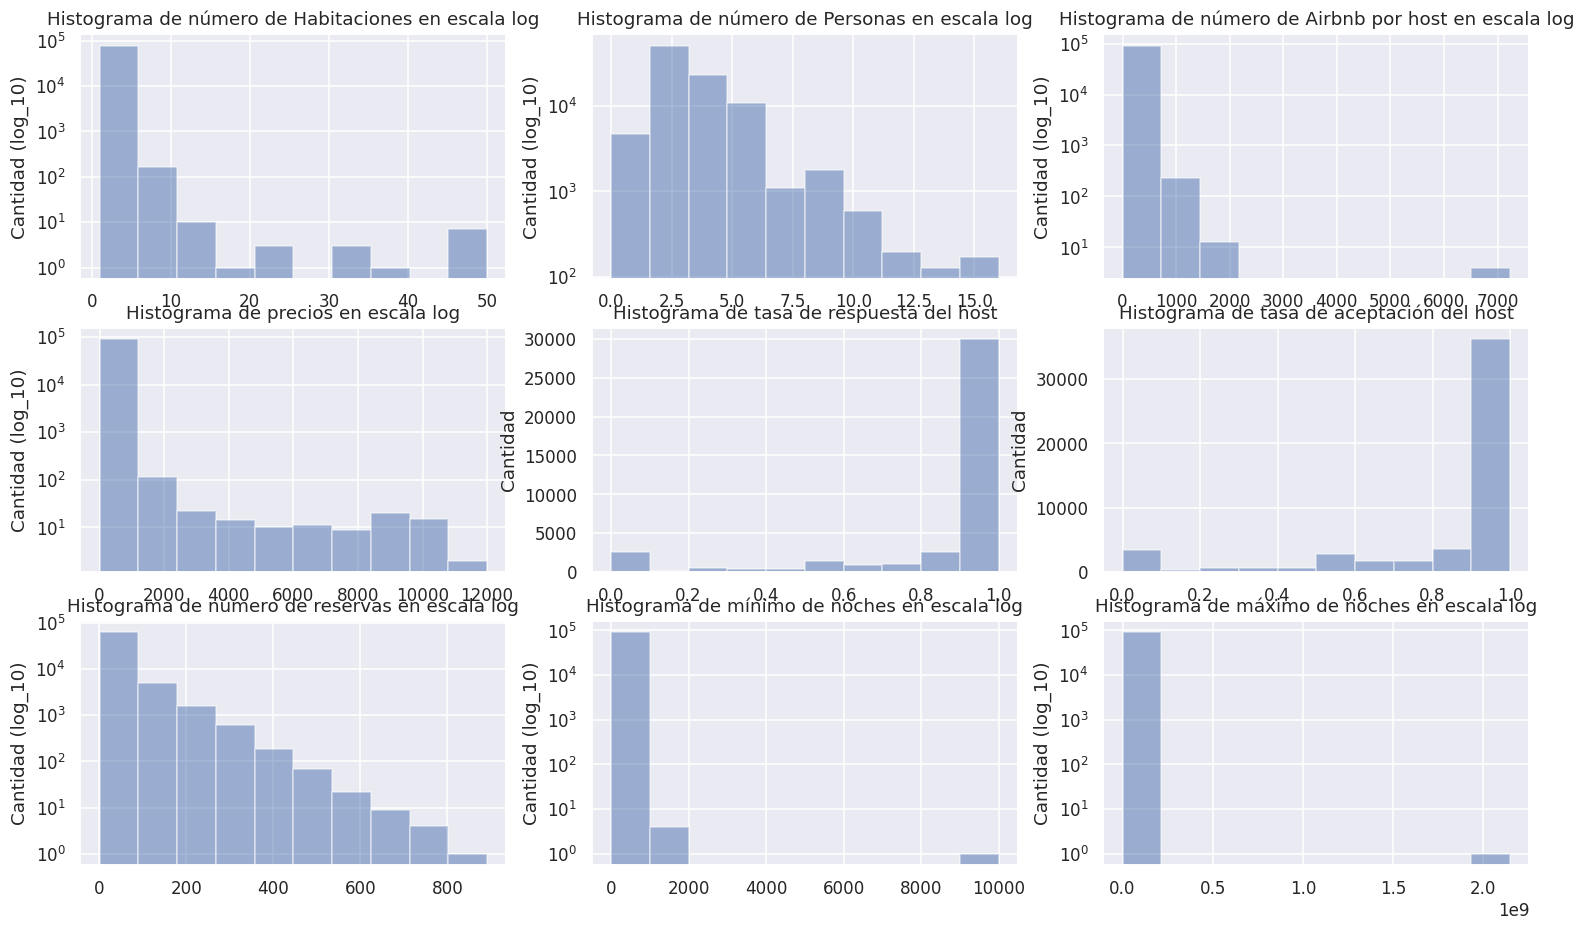

In [ ]:
#@title Histograma de datos
fig_dist, axes_dist = plt.subplots(nrows=3, ncols=3, sharey = False, figsize=(17,10))

df_listings['bedrooms'].plot.hist(alpha = 0.5 , ax = axes_dist[0][0]);
axes_dist[0][0].set_title('Histograma de número de Habitaciones en escala log')
axes_dist[0][0].set_yscale('log')
axes_dist[0][0].set_ylabel('Cantidad (log_10)')

df_listings['accommodates'].plot.hist(alpha = 0.5, ax = axes_dist[0][1]);
axes_dist[0][1].set_title('Histograma de número de Personas en escala log')
axes_dist[0][1].set_yscale('log')
axes_dist[0][1].set_ylabel('Cantidad (log_10)')

df_listings['host_total_listings_count'].plot.hist(alpha = 0.5, ax = axes_dist[0][2]);
axes_dist[0][2].set_title('Histograma de número de Airbnb por host en escala log')
axes_dist[0][2].set_yscale('log')
axes_dist[0][2].set_ylabel('Cantidad (log_10)')

df_listings['price'].plot.hist(alpha = 0.5, ax = axes_dist[1][0]);
axes_dist[1][0].set_title('Histograma de precios en escala log')
axes_dist[1][0].set_yscale('log')
axes_dist[1][0].set_ylabel('Cantidad (log_10)')

df_listings['host_response_rate'].plot.hist(alpha = 0.5, ax = axes_dist[1][1]);
axes_dist[1][1].set_title('Histograma de tasa de respuesta del host')
axes_dist[1][1].set_ylabel('Cantidad')


df_listings['host_acceptance_rate'].plot.hist(alpha = 0.5, ax = axes_dist[1][2]);
axes_dist[1][2].set_title('Histograma de tasa de aceptación del host')
axes_dist[1][2].set_ylabel('Cantidad')

df_listings['review_counts'].plot.hist(alpha = 0.5, ax = axes_dist[2][0]);
axes_dist[2][0].set_title('Histograma de número de reservas en escala log')
axes_dist[2][0].set_yscale('log')
axes_dist[2][0].set_ylabel('Cantidad (log_10)')


df_listings['minimum_nights'].plot.hist(alpha = 0.5, ax = axes_dist[2][1]);
axes_dist[2][1].set_title('Histograma de mínimo de noches en escala log')
axes_dist[2][1].set_yscale('log')
axes_dist[2][1].set_ylabel('Cantidad (log_10)')

df_listings['maximum_nights'].plot.hist(alpha = 0.5, ax = axes_dist[2][2]);
axes_dist[2][2].set_title('Histograma de máximo de noches en escala log')
axes_dist[2][2].set_yscale('log')
axes_dist[2][2].set_ylabel('Cantidad (log_10)')


# 2. Preparación de los datos


---



## **2.1 Limpieza de datos**

### **2.1.1 Eliminación de columnas**
>Se comienza eliminando las columnas de **district** al estar vacía y la columna de **instant_bookable** al ser una variable que indica si está disponible, valor que varía por causas fuera del alcance de este análisis. La columna **host_location** se elimina por la misma causa.

> Acorde a la ley el máximo que puedes ofrecer una casa en Airbnb es 120 días, pero en el dataset se encuentran gran cantidad de datos por encíma de estos. Por lo que se supone que estos datos no serán indicadores fiables de los datos reales.

In [ ]:
len(df_listings.loc[df_listings['maximum_nights']>120])

58469

In [ ]:
df_listings = df_listings.drop(['name','district','instant_bookable', 'host_location','maximum_nights','minimum_nights'], axis=1)
pd.options.display.max_columns = 0

### **2.1.2 Eliminación de registros**
>Se eliminan los registros que no tienen las diferentes reviews, para analizar la cantidad de datos que estamos eliminando de cada columna se usa el método **describe**. Se observa que los datos que se van a eliminar (23384) están cerca al promedio del general de sus respectivas columnas y sus desviaciones estándar presentan características similares. Por lo que se presupone que el análisis finalno presentará variaciones significativas.

In [ ]:
reviews_cols = ['review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value']
parameters_to_describe = ['host_response_rate',	'host_acceptance_rate',	'host_total_listings_count',	'latitude',	'longitude',	'accommodates',	'bedrooms',	'price',	'review_counts']
df_listings.loc[df_listings[reviews_cols].isna().all(axis=1), parameters_to_describe].describe()

host_response_rate  host_acceptance_rate  ...       price  review_counts
count          7944.00000            8799.00000  ... 23396.00000     1493.00000
mean              0.80293               0.78053  ...   135.72491        1.21031
std               0.32729               0.33704  ...   379.07054        0.74133
min               0.00000               0.00000  ...     0.00000        1.00000
25%               0.78000               0.67000  ...    55.00000        1.00000
50%               1.00000               0.97000  ...    80.00000        1.00000
75%               1.00000               1.00000  ...   125.00000        1.00000
max               1.00000               1.00000  ... 10571.00000       12.00000

[8 rows x 9 columns]

In [ ]:
df_listings = df_listings.loc[df_listings[reviews_cols].notna().all(axis=1)]

Se eliminan filas que tengan datos de cuarto compartido y cuartos de hotel, ya que el objetivo de estudio es validar una habitación privada o una vivienda completa y a su vez, se eliminan las viviendas cuyo precio sea mayor a 2000 euros por noche.

In [ ]:
df_listings = df_listingsdf_listings = df_listings.drop(df_listings[df_listings['price'] > 2000].index).loc[(df_listings['room_type']=='Private room') | (df_listings['room_type']=='Entire place')]
df_listings = df_listings.loc[(df_listings['property_type']=='Entire apartment') | (df_listings['property_type']=='Private room in apartment') | (df_listings['property_type']=='Entire condominium') | (df_listings['property_type']=='Entire loft')]
df_listings = df_listings.drop(df_listings[df_listings['price'] > 2000].index)
df_listings = df_listings.dropna(subset=['host_since'])


##  **2.2 Preprocesamiento de datos**

> Se remplzan las columnas de f (false) y t (true) a 0 y 1 respectivamente

In [ ]:
#host_is_superhost
df_listings['host_is_superhost']=df_listings['host_is_superhost'].replace('f',0)
df_listings['host_is_superhost']=df_listings['host_is_superhost'].replace('t',1)
#host_has_profile_pic
df_listings['host_has_profile_pic']=df_listings['host_has_profile_pic'].replace('f',0)
df_listings['host_has_profile_pic']=df_listings['host_has_profile_pic'].replace('t',1)
#host_identity_verified
df_listings['host_identity_verified']=df_listings['host_identity_verified'].replace('f',0)
df_listings['host_identity_verified']=df_listings['host_identity_verified'].replace('t',1)

> Se llena la columna de las habitaciones con la media

In [ ]:
df_listings['bedrooms'] = df_listings['bedrooms'].fillna(df_listings['bedrooms'].mean())

##  **2.3 Selección de datos finales**

Se presenta cómo quedaron los datos finales seleccionados para el análisis

In [ ]:
df_listings.sample(10)

listing_id    host_id  ... review_scores_value review_counts
88965    26298753    3946885  ...             9.00000      43.00000
86405    19051783    9515134  ...             9.00000      36.00000
28357    32638181  190800229  ...            10.00000       3.00000
85759    21848432    1730434  ...            10.00000      24.00000
303      17033100    9157096  ...            10.00000       7.00000
25790    44029463    6209714  ...            10.00000       1.00000
21433     4864930    3356656  ...             9.00000     187.00000
1744      7656453    7345282  ...            10.00000       4.00000
35917    44714642  361461081  ...             8.00000       1.00000
73637    44280730  135995600  ...             9.00000      11.00000

[10 rows x 28 columns]

Text(0, 0.5, 'Cantidad (log_10)')

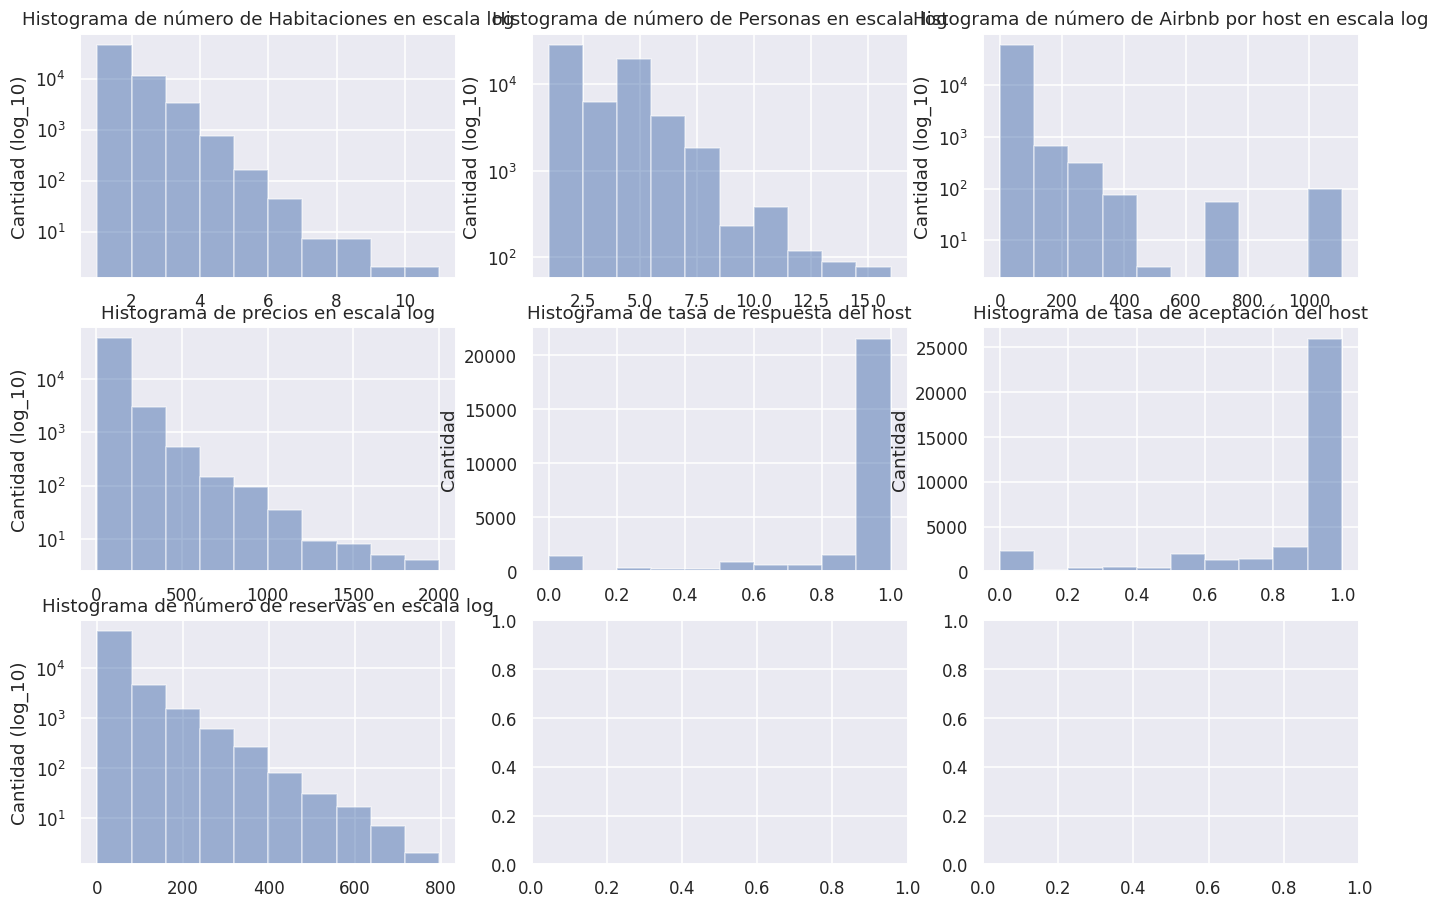

In [ ]:
#@title Histograma de datos finales
fig_elim, axes_elim = plt.subplots(nrows=3, ncols=3, sharey = False, figsize=(15,10))

df_listings['bedrooms'].plot.hist(alpha = 0.5 , ax = axes_elim[0][0]);
axes_elim[0][0].set_title('Histograma de número de Habitaciones en escala log')
axes_elim[0][0].set_yscale('log')
axes_elim[0][0].set_ylabel('Cantidad (log_10)')

df_listings['accommodates'].plot.hist(alpha = 0.5, ax = axes_elim[0][1]);
axes_elim[0][1].set_title('Histograma de número de Personas en escala log')
axes_elim[0][1].set_yscale('log')
axes_elim[0][1].set_ylabel('Cantidad (log_10)')

df_listings['host_total_listings_count'].plot.hist(alpha = 0.5, ax = axes_elim[0][2]);
axes_elim[0][2].set_title('Histograma de número de Airbnb por host en escala log')
axes_elim[0][2].set_yscale('log')
axes_elim[0][2].set_ylabel('Cantidad (log_10)')

df_listings['price'].plot.hist(alpha = 0.5, ax = axes_elim[1][0]);
axes_elim[1][0].set_title('Histograma de precios en escala log')
axes_elim[1][0].set_yscale('log')
axes_elim[1][0].set_ylabel('Cantidad (log_10)')

df_listings['host_response_rate'].plot.hist(alpha = 0.5, ax = axes_elim[1][1]);
axes_elim[1][1].set_title('Histograma de tasa de respuesta del host')
axes_elim[1][1].set_ylabel('Cantidad')


df_listings['host_acceptance_rate'].plot.hist(alpha = 0.5, ax = axes_elim[1][2]);
axes_elim[1][2].set_title('Histograma de tasa de aceptación del host')
axes_elim[1][2].set_ylabel('Cantidad')

df_listings['review_counts'].plot.hist(alpha = 0.5, ax = axes_elim[2][0]);
axes_elim[2][0].set_title('Histograma de número de reservas en escala log')
axes_elim[2][0].set_yscale('log')
axes_elim[2][0].set_ylabel('Cantidad (log_10)')


# 3. Estudio del problema


---

##3.1 Reviews

#### 3.1.1 Correlaciones entre reviews

> Buscamos establecer correlaciones entre las reviews, reservas y los demás datos y categorías.

> Queremos hayar con un 95% de confianza si los demás puntajes de reviews son positivos **review_scores_rating** también lo será. Para esto nos basamos en el coeficiente de relación de Kendall.

>Las hipótesis planteadas son:

>>**H**: El puntaje de **review_scores_rating** coincide con los demás.

>>**H0**: El puntaje de **review_scores_rating** no coincide con los demás puntajes de reviews.

In [ ]:
data_columns = ['host_response_rate',	'host_acceptance_rate',	'host_is_superhost',	'host_total_listings_count',	'host_has_profile_pic',	'host_identity_verified',	'latitude',	'longitude',	'accommodates',	'bedrooms',	'price',	'review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value',	'review_counts']


In [ ]:
reviews_cols = ['review_scores_rating',	'review_scores_accuracy',	'review_scores_cleanliness',	'review_scores_checkin',	'review_scores_communication',	'review_scores_location',	'review_scores_value']
df_listings_reviews = df_listings[reviews_cols]


pd.set_option('display.float_format', lambda x: '%.5f' % x)

# Create an empty DataFrame to store the p-values
p_values_df = pd.DataFrame(index=reviews_cols, columns=reviews_cols)

# Loop over each pair of columns and calculate the p-value
for i, col1 in enumerate(reviews_cols):
    for j, col2 in enumerate(reviews_cols):
        if i < j:
            corr, p_value = stats.kendalltau(df_listings_reviews[col1], df_listings_reviews[col2])
            p_values_df.loc[col1, col2] = p_value
            p_values_df.loc[col2, col1] = p_value


In [ ]:
p_values_df

review_scores_rating  ... review_scores_value
review_scores_rating                         NaN  ...             0.00000
review_scores_accuracy                   0.00000  ...             0.00000
review_scores_cleanliness                0.00000  ...             0.00000
review_scores_checkin                    0.00000  ...             0.00000
review_scores_communication              0.00000  ...             0.00000
review_scores_location                   0.00000  ...             0.00000
review_scores_value                      0.00000  ...                 NaN

[7 rows x 7 columns]

>Parece que todas las variables están altamente correlacionadas, ya que sus valores de correlación (p-values) son cercanos a cero, lo que indica que presentan comportamiento similar. Sin embargo, al examinar la distribución de los datos, se observa que no siguen una distribución normal. Esto implica que es necesario realizar otros tipos de análisis para determinar las correlaciones con mayor precisión. No obstante, estos análisis están más allá del alcance de este curso

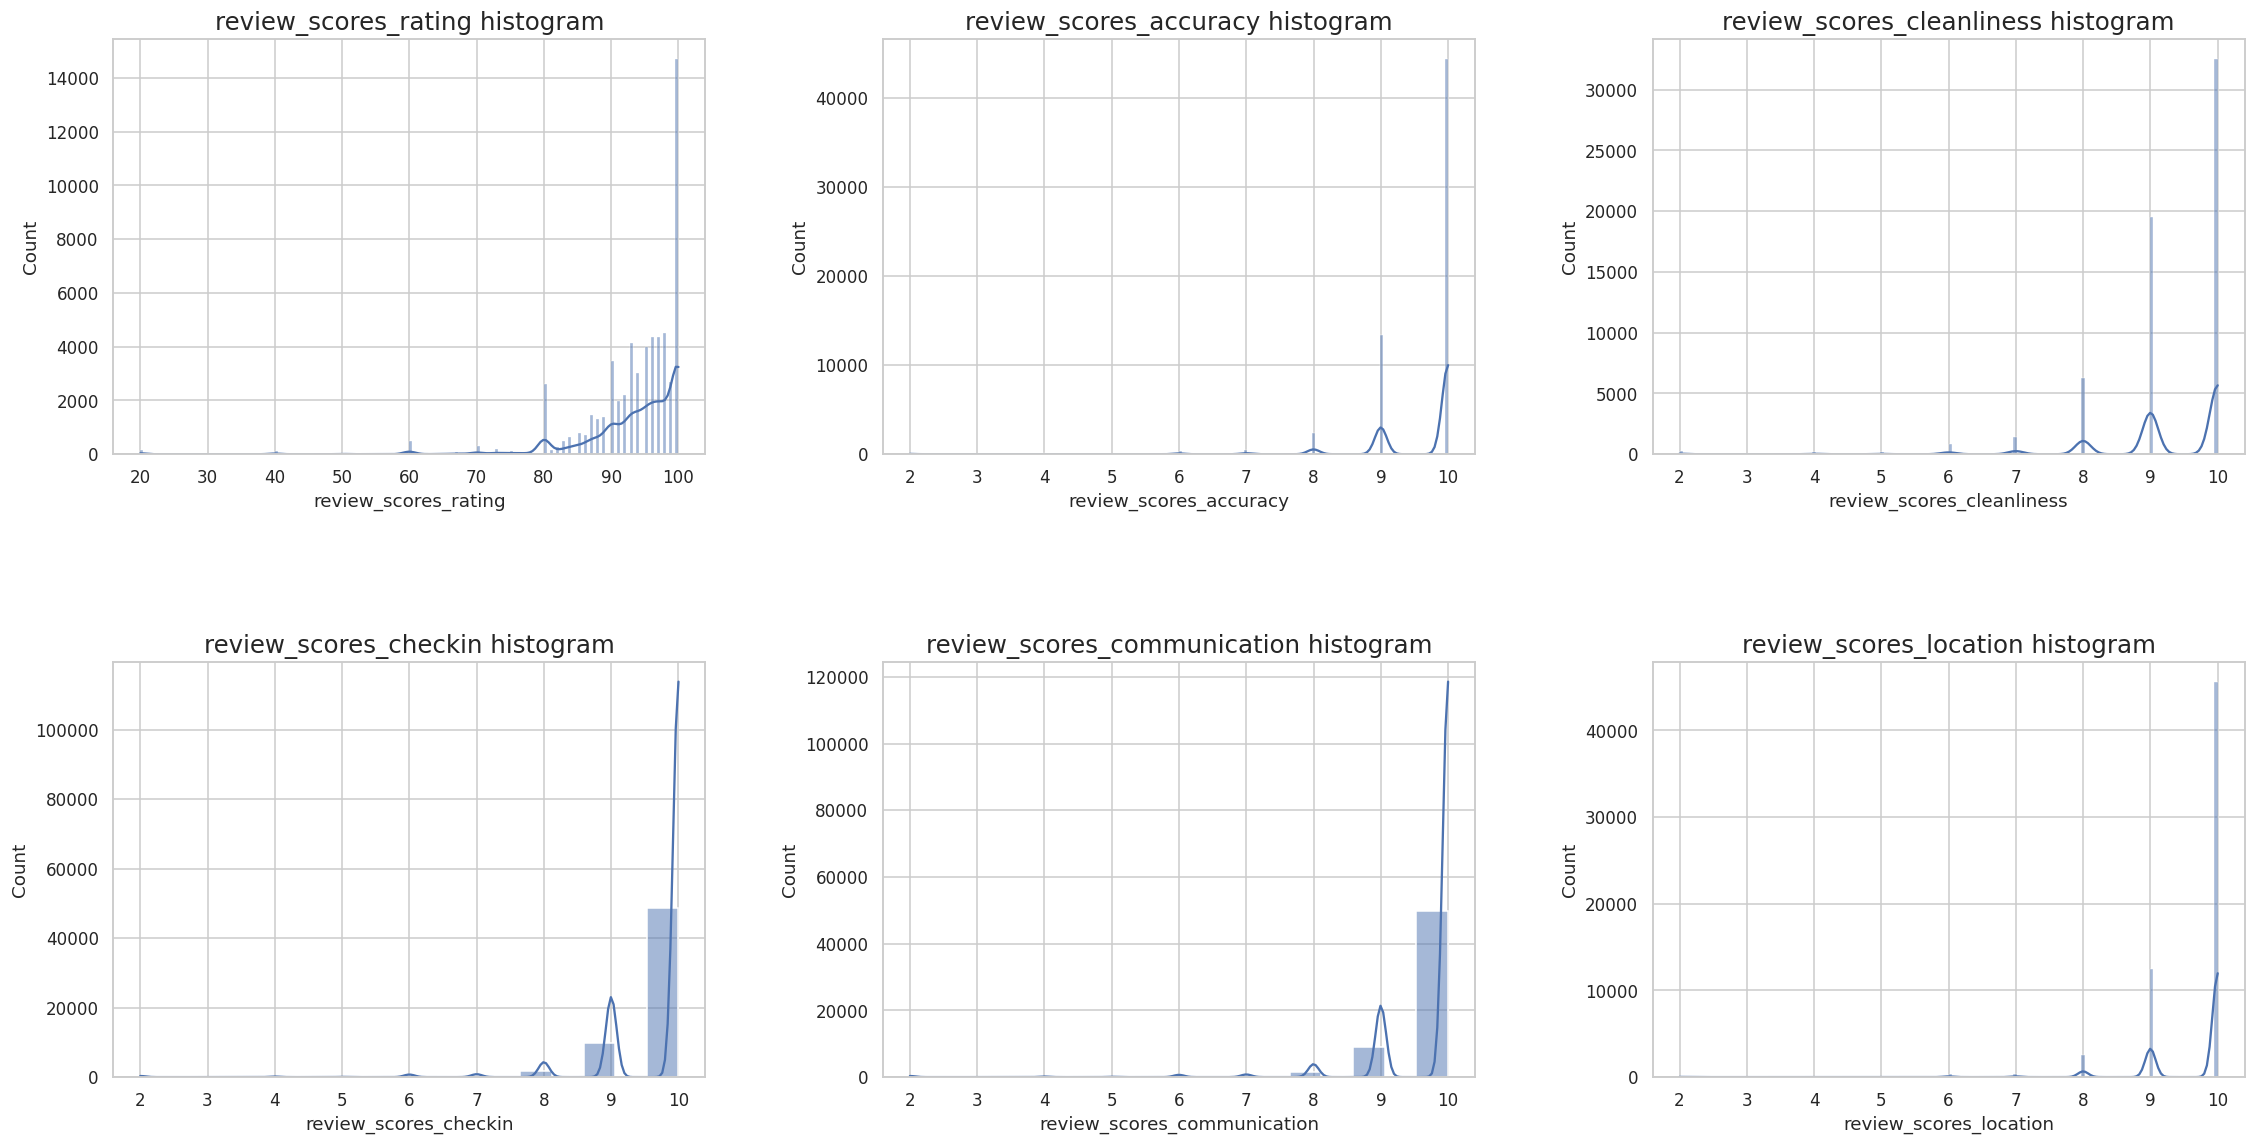

In [ ]:
#@title Reviews histrograms
# Set the style of the plot
sns.set_style('whitegrid')

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(25,20))

# Flatten the axes array to loop over it
axes = axes.flatten()

# Loop over each column and plot it
for i, col in enumerate(reviews_cols):
    sns.histplot(df_listings_reviews[col], kde=True, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Count', fontsize=12)
    axes[i].set_title(f'{col} histogram', fontsize=16)

# Remove any extra subplots
for j in range(len(reviews_cols)-1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()


--

>En esta sección se busca analizar si existe alguna correlación entre las calificaciones otorgadas por los usuarios en las reseñas (reviews). Al examinar los datos, se puede observar que cuando la calificación general (review_scores_rating) es positiva, existe una tendencia a que las calificaciones específicas en cada categoría (exactitud, limpieza, check-in, comunicación, ubicación y relación calidad-precio) también sean positivas.


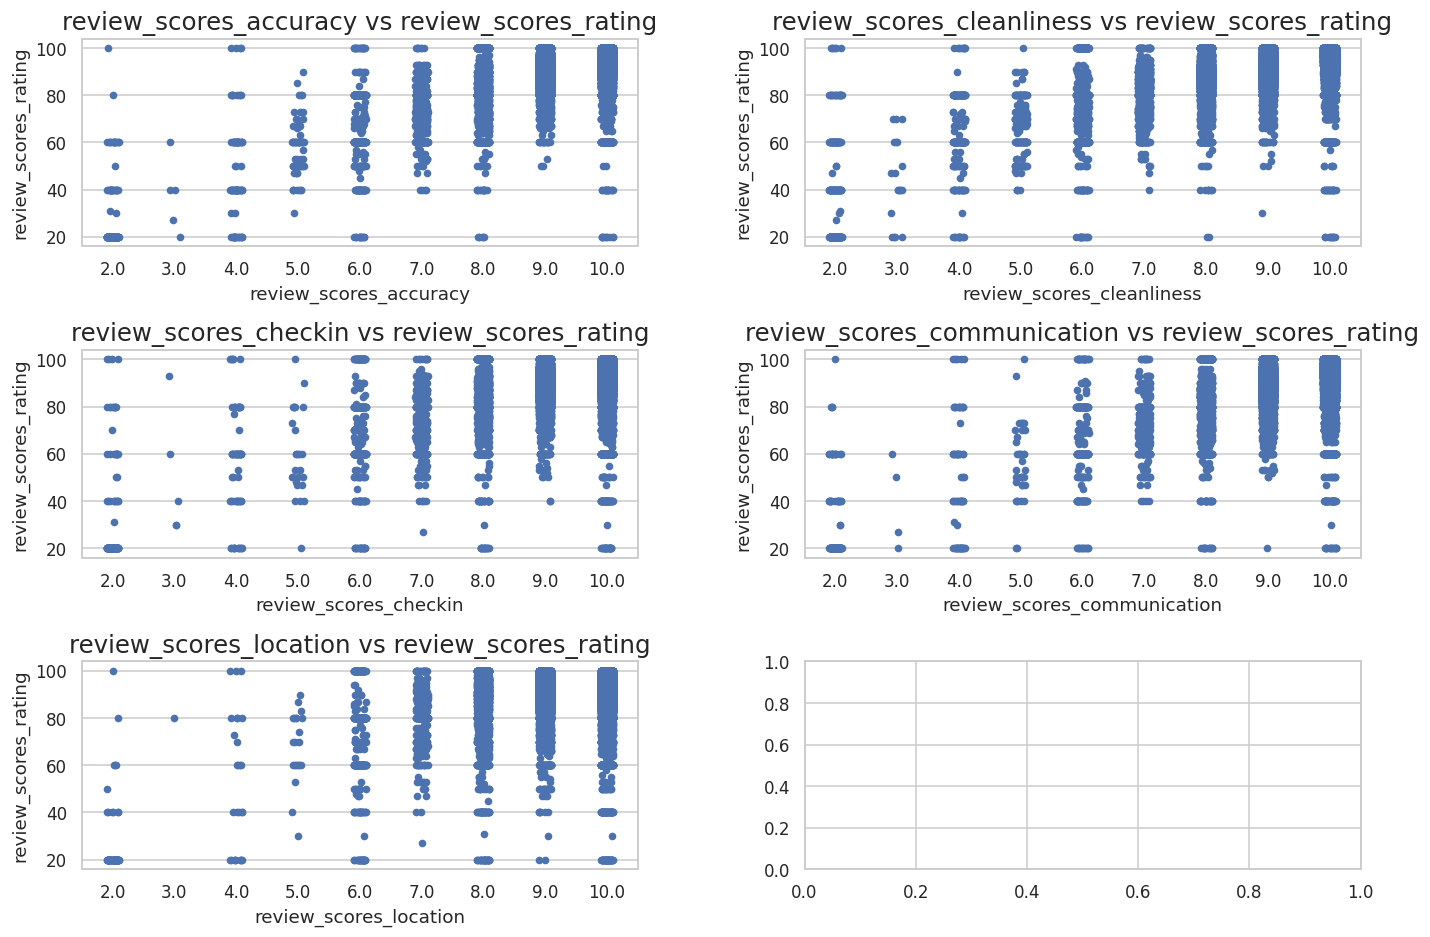

In [ ]:
#@title Reviews scatterplot
# Set the style of the plot
sns.set_style('whitegrid')

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

# Flatten the axes array to loop over it
axes = axes.flatten()

# Loop over each column and plot it
for i, col in enumerate(reviews_cols[1:-1]):
    sns.stripplot(x=col, y='review_scores_rating', data=df_listings_reviews, ax=axes[i])
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('review_scores_rating', fontsize=12)
    axes[i].set_title(f'{col} vs review_scores_rating', fontsize=16)

# Remove any extra subplots
for j in range(len(reviews_cols)-1, len(axes)):
    fig.delaxes(axes[j])

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.5)

# Show the plot
plt.show()

### 3.1.2 Cantidad de reservas vs calificaciones


>Al analizar los datos, se puede observar que los alojamientos con una mayor cantidad de reservas suelen tener calificaciones más altas. Es decir, existe una correlación positiva entre la cantidad de reservas y las calificaciones otorgadas por los usuarios. Además, se puede notar que la mayoría de las reservas se incrementan significativamente cuando el alojamiento tiene una calificación general superior a 80 puntos.


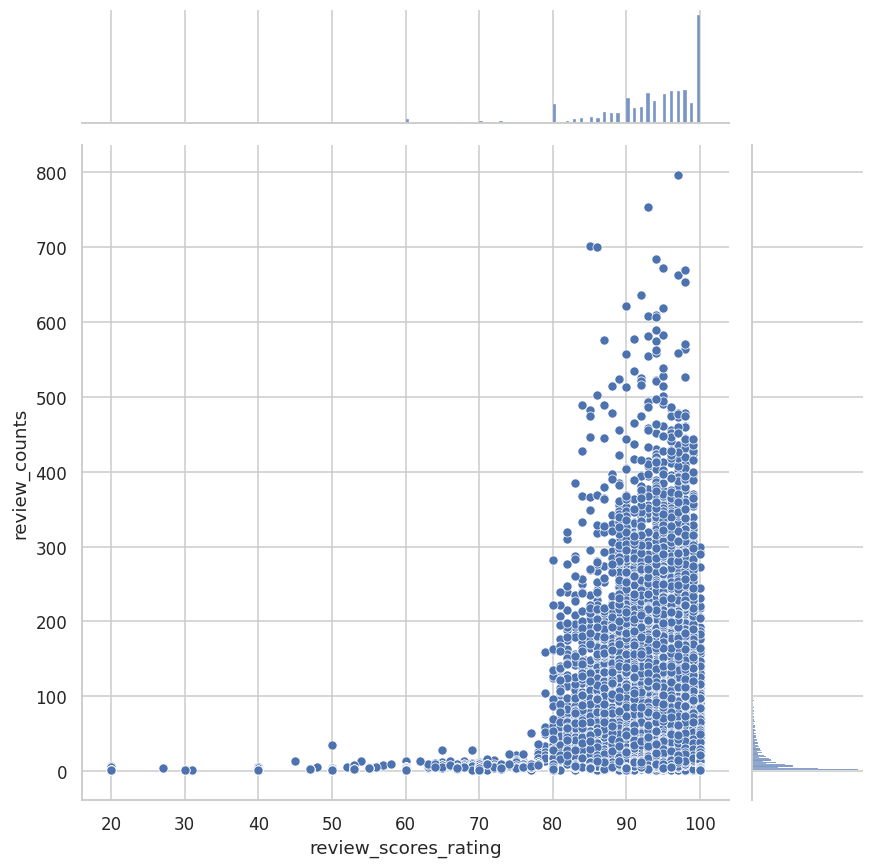

In [ ]:
sns.jointplot(x ='review_scores_rating',
              y ='review_counts',
              data = df_listings,
              kind = 'scatter',
              height=8);

### 3.1.3 Reviews por perfil de usuario

Al analizar la distribución de los tiempos de respuesta de los usuarios, se observa que el tiempo que tardan en responder no tiene un impacto significativo en las calificaciones otorgadas. Sin embargo, se puede notar que los usuarios que responden más rápidamente suelen tener una mayor cantidad de reservas y, en consecuencia, sus promedios y calificaciones máximas son mejores. En otras palabras, existe una correlación positiva entre la rapidez en la respuesta y el número de reservas, lo que puede influir en la percepción general de los usuarios sobre la calidad del servicio ofrecido.

In [ ]:
df_listings[['host_response_time','review_scores_rating','review_counts']].groupby('host_response_time').describe().transpose()

host_response_time          a few days or more  ...  within an hour
review_scores_rating count          2245.00000  ...     14884.00000
                     mean             91.01158  ...        93.26780
                     std              11.45828  ...         7.99830
                     min              20.00000  ...        20.00000
                     25%              88.00000  ...        91.00000
                     50%              94.00000  ...        95.00000
                     75%              98.00000  ...        98.00000
                     max             100.00000  ...       100.00000
review_counts        count          2245.00000  ...     14884.00000
                     mean             27.72472  ...        55.48065
                     std              46.70361  ...        77.71330
                     min               1.00000  ...         1.00000
                     25%               3.00000  ...         7.00000
                     50%               9.00000  ...        24.00000
                     75%              30.00000  ...        72.00000
                     max             576.00000  ...       754.00000

[16 rows x 4 columns]

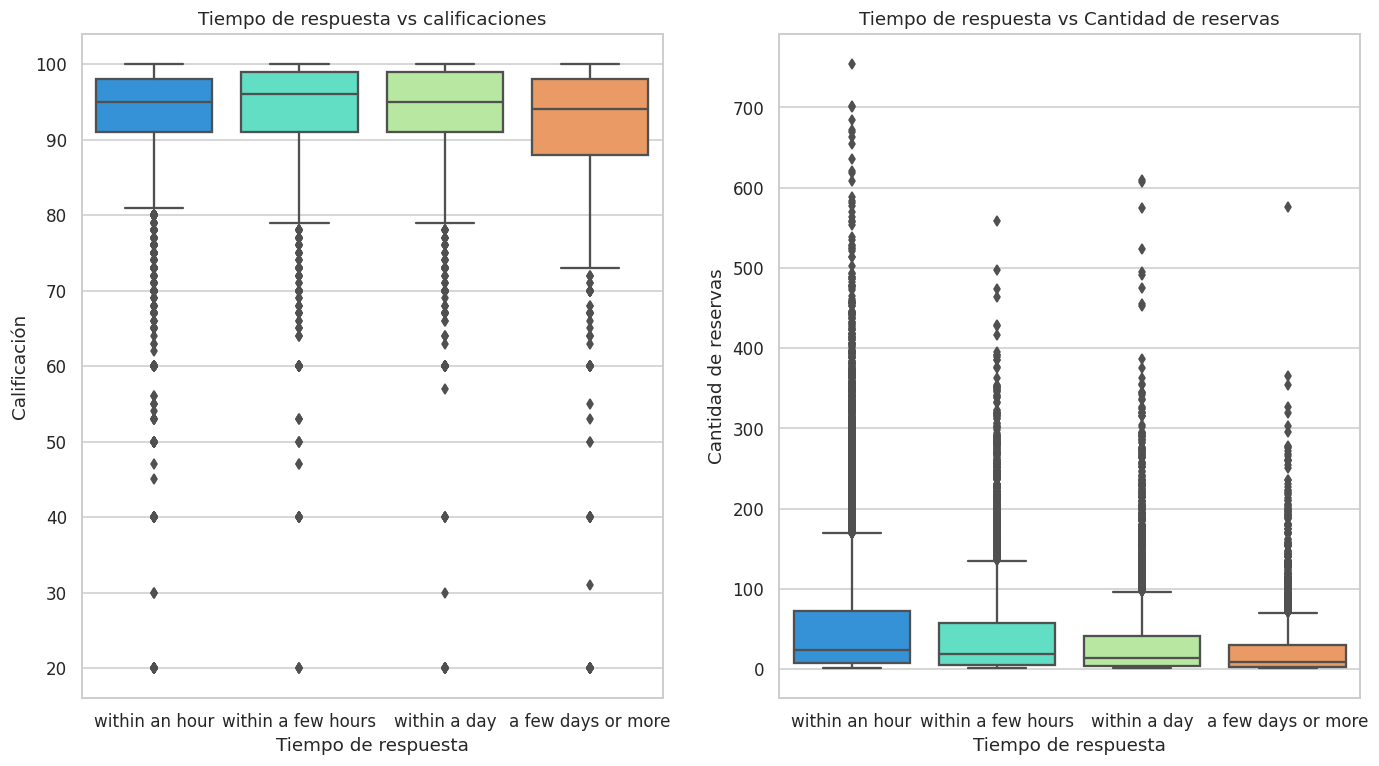

In [ ]:
# df_listings.info()
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax[0] = sns.boxplot(x="host_response_time",
                 y="review_scores_rating",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[0])

ax[0].set_title("Tiempo de respuesta vs calificaciones")
ax[0].set_xlabel("Tiempo de respuesta")
ax[0].set_ylabel("Calificación");


ax[1] = sns.boxplot(x="host_response_time",
                 y="review_counts",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[1])

ax[1].set_title("Tiempo de respuesta vs Cantidad de reservas")
ax[1].set_xlabel("Tiempo de respuesta")
ax[1].set_ylabel("Cantidad de reservas");

> Se puede observar que los anfitriones con la distinción de "superhost" logran obtener calificaciones más altas y una mayor cantidad de reservas en comparación con aquellos que no tienen dicha distinción. Además, en ambos casos se obtienen promedios más altos, pero se observa que los superhost tienen desviaciones estándar menores en las calificaciones, lo que sugiere una mayor consistencia en la calidad de su servicio.

In [ ]:
df_listings[['host_is_superhost','review_scores_rating','review_counts']].groupby('host_is_superhost').describe().transpose()

host_is_superhost                    0           1
review_scores_rating count 48960.00000 12384.00000
                     mean     92.43770    96.90520
                     std       9.10560     3.37575
                     min      20.00000    20.00000
                     25%      90.00000    96.00000
                     50%      94.00000    98.00000
                     75%     100.00000    99.00000
                     max     100.00000   100.00000
review_counts        count 48960.00000 12384.00000
                     mean     25.39328    65.17676
                     std      47.01761    76.45699
                     min       1.00000     1.00000
                     25%       3.00000    15.00000
                     50%       8.00000    38.00000
                     75%      25.00000    85.25000
                     max     796.00000   672.00000

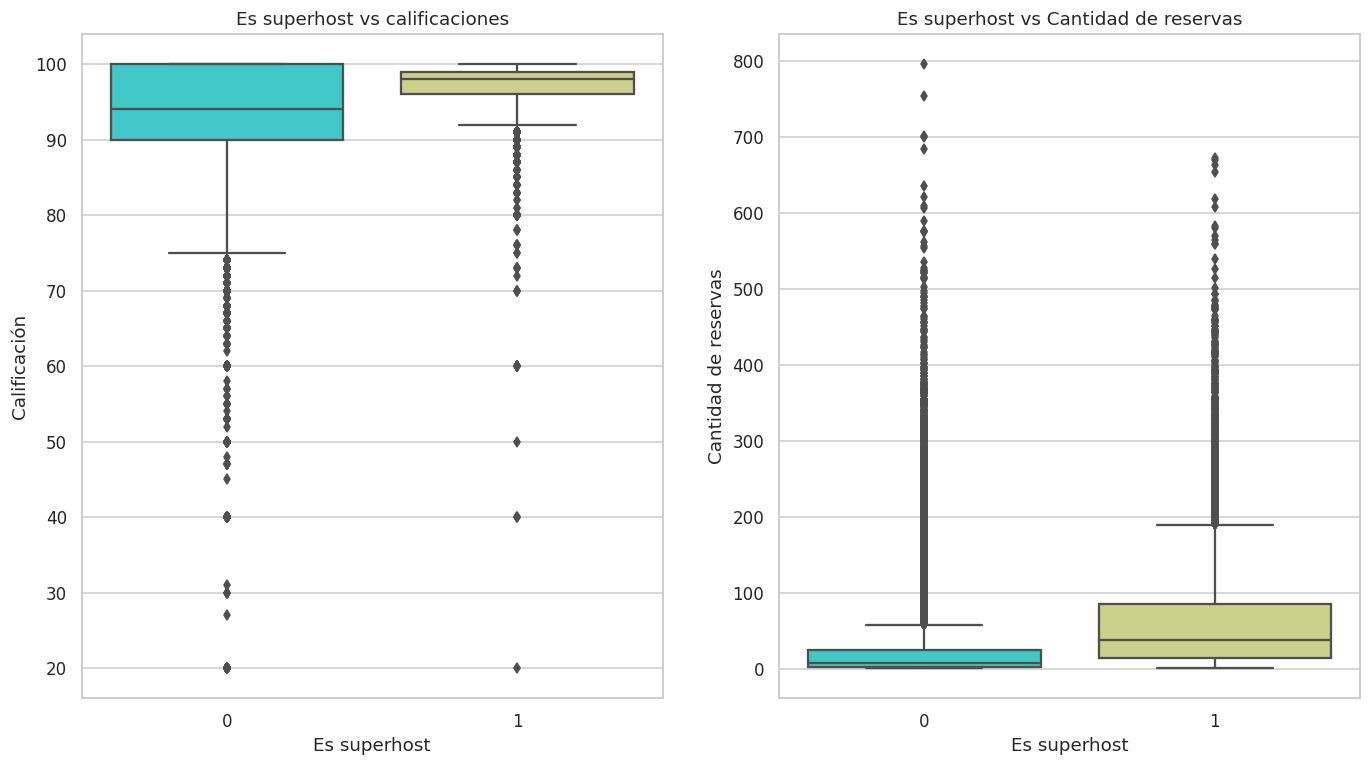

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax[0] = sns.boxplot(x="host_is_superhost",
                 y="review_scores_rating",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[0])

ax[0].set_title("Es superhost vs calificaciones")
ax[0].set_xlabel("Es superhost")
ax[0].set_ylabel("Calificación");


ax[1] = sns.boxplot(x="host_is_superhost",
                 y="review_counts",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[1])

ax[1].set_title("Es superhost vs Cantidad de reservas")
ax[1].set_xlabel("Es superhost")
ax[1].set_ylabel("Cantidad de reservas");


> Aunque hay pocos usuarios que no tienen una foto de perfil, no se observa un comportamiento concluyente que indique que esto afecte significativamente la cantidad de reservas o las calificaciones. Sin embargo, se puede observar que la mayoría de los usuarios que tienen una cantidad muy alta de reservas tienen una foto de perfil.

In [ ]:
df_listings[['host_has_profile_pic','review_scores_rating','review_counts']].groupby('host_has_profile_pic').describe().transpose()

host_has_profile_pic               0           1
review_scores_rating count 124.00000 61220.00000
                     mean   92.23387    93.34183
                     std     9.75064     8.46413
                     min    40.00000    20.00000
                     25%    90.00000    90.00000
                     50%    95.00000    95.00000
                     75%    99.00000    99.00000
                     max   100.00000   100.00000
review_counts        count 124.00000 61220.00000
                     mean   27.60484    33.43648
                     std    48.98445    56.57748
                     min     1.00000     1.00000
                     25%     3.00000     4.00000
                     50%    11.00000    12.00000
                     75%    31.50000    36.00000
                     max   446.00000   796.00000

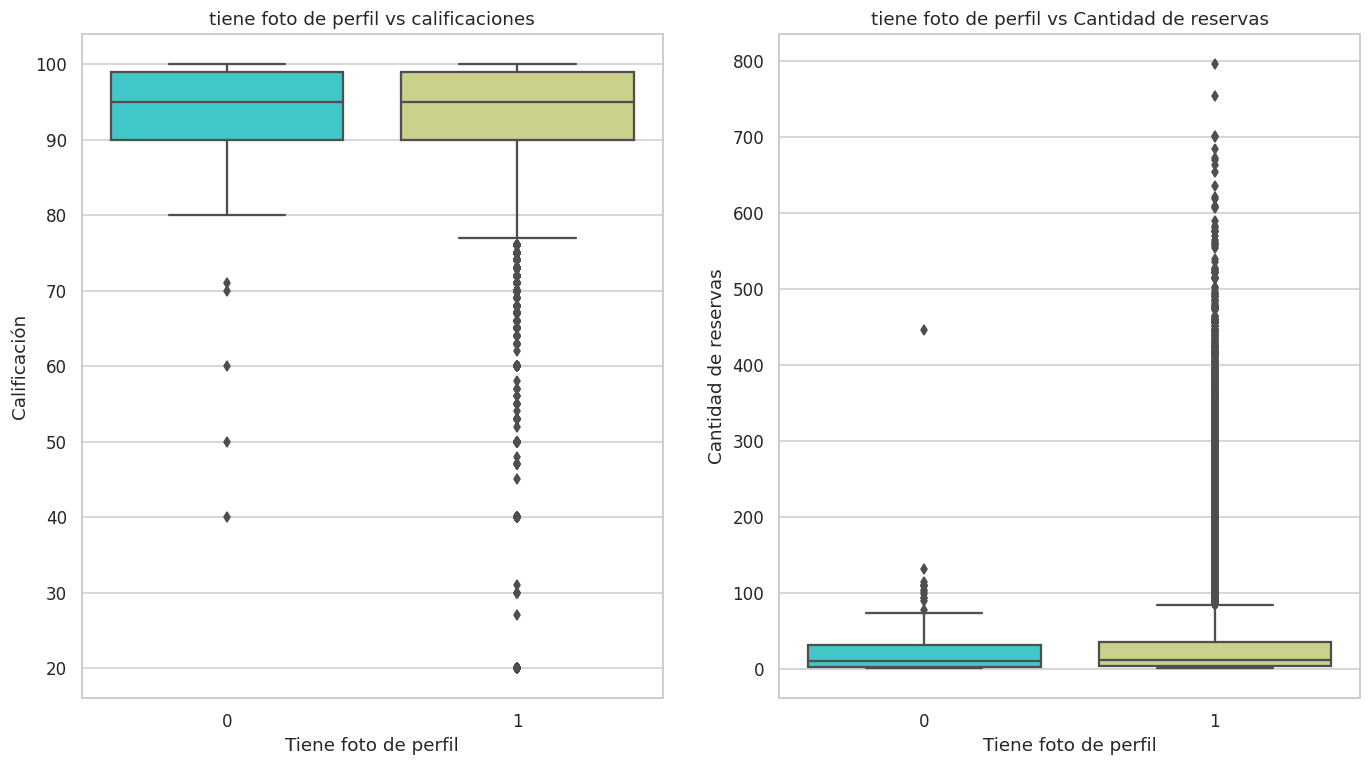

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax[0] = sns.boxplot(x="host_has_profile_pic",
                 y="review_scores_rating",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[0])

ax[0].set_title("tiene foto de perfil vs calificaciones")
ax[0].set_xlabel("Tiene foto de perfil")
ax[0].set_ylabel("Calificación");


ax[1] = sns.boxplot(x="host_has_profile_pic",
                 y="review_counts",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[1])

ax[1].set_title("tiene foto de perfil vs Cantidad de reservas")
ax[1].set_xlabel("Tiene foto de perfil")
ax[1].set_ylabel("Cantidad de reservas");


> Dado que la mayoría de los usuarios están verificados, incluso por pequeñas diferencias, estos logran acumular una calificación promedio más alta y una desviación estándar menor. Además, se observa una diferencia significativa en el número de reservas entre los usuarios verificados y no verificados, siendo el mayor número de reservas registrado en los usuarios verificados.

In [ ]:
df_listings[['host_identity_verified','review_scores_rating','review_counts']].groupby('host_identity_verified').describe().transpose()

host_identity_verified               0           1
review_scores_rating count 11645.00000 49699.00000
                     mean     92.67737    93.49476
                     std      10.15057     8.01378
                     min      20.00000    20.00000
                     25%      90.00000    91.00000
                     50%      96.00000    95.00000
                     75%     100.00000    99.00000
                     max     100.00000   100.00000
review_counts        count 11645.00000 49699.00000
                     mean     15.71816    37.57351
                     std      28.47315    60.56789
                     min       1.00000     1.00000
                     25%       2.00000     4.00000
                     50%       6.00000    14.00000
                     75%      17.00000    43.00000
                     max     486.00000   796.00000

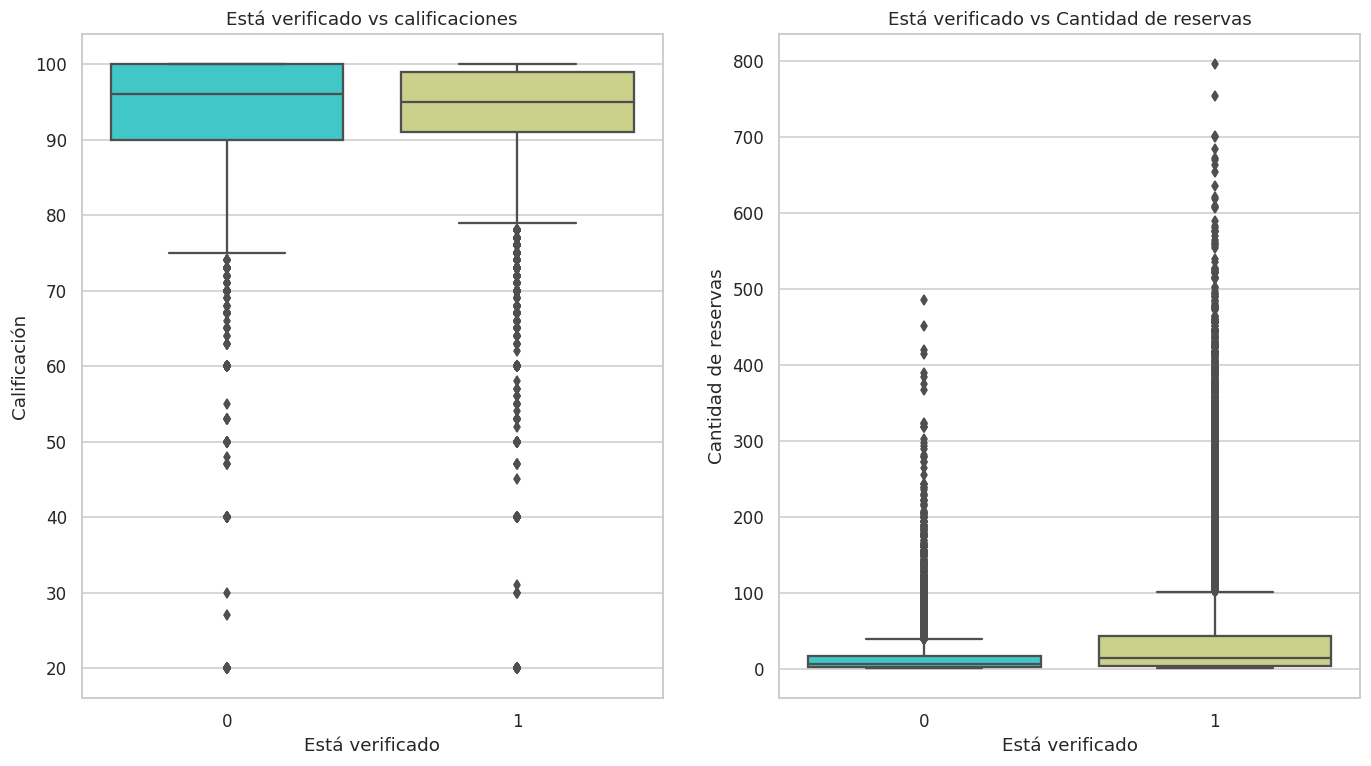

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
ax[0] = sns.boxplot(x="host_identity_verified",
                 y="review_scores_rating",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[0])

ax[0].set_title("Está verificado vs calificaciones")
ax[0].set_xlabel("Está verificado")
ax[0].set_ylabel("Calificación");


ax[1] = sns.boxplot(x="host_identity_verified",
                 y="review_counts",
                 data=df_listings,
                 palette='rainbow',
                 ax=ax[1])

ax[1].set_title("Está verificado vs Cantidad de reservas")
ax[1].set_xlabel("Está verificado")
ax[1].set_ylabel("Cantidad de reservas");

### 3.1.4 Precio vs Calificacion y Reservas

>Se ha observado que los precios altos no están necesariamente asociados con una buena calificación.

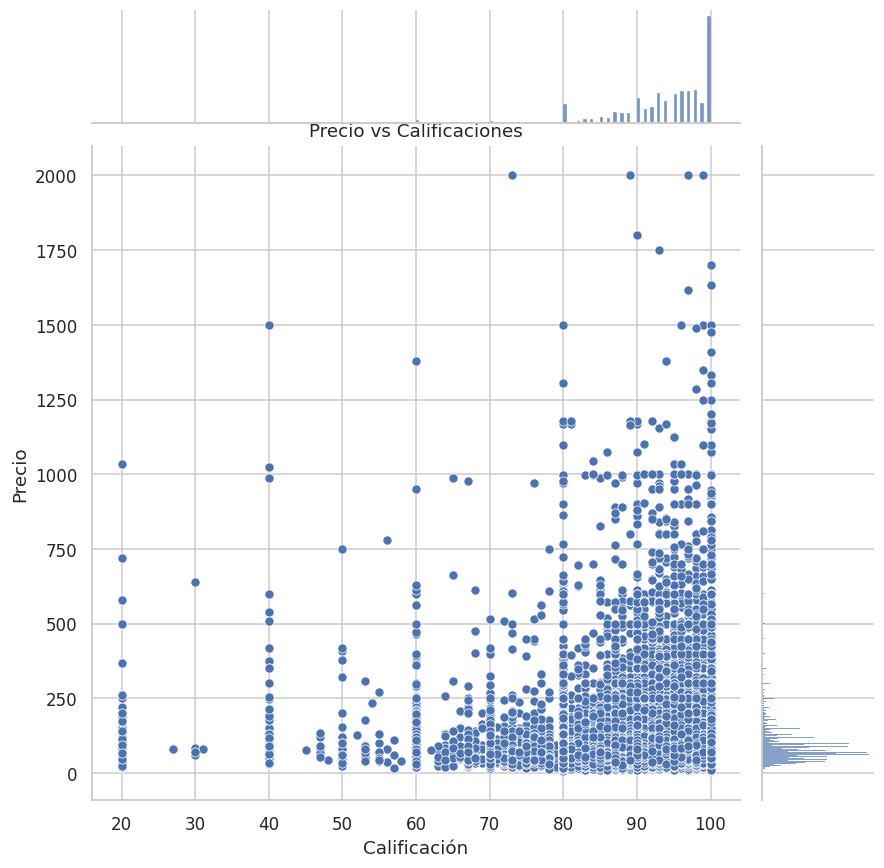

In [ ]:
ax = sns.jointplot(x ='review_scores_rating',
              y ='price',
              data = df_listings,
              kind = 'scatter',
              height=8);


ax.ax_joint.set_title("Precio vs Calificaciones")
ax.ax_joint.set_xlabel("Calificación")
ax.ax_joint.set_ylabel("Precio");

>Se ha notado que la mayoría de las reservas se realizan para precios inferiores a 250, y que a medida que los precios disminuyen, aumenta la cantidad de reservas.

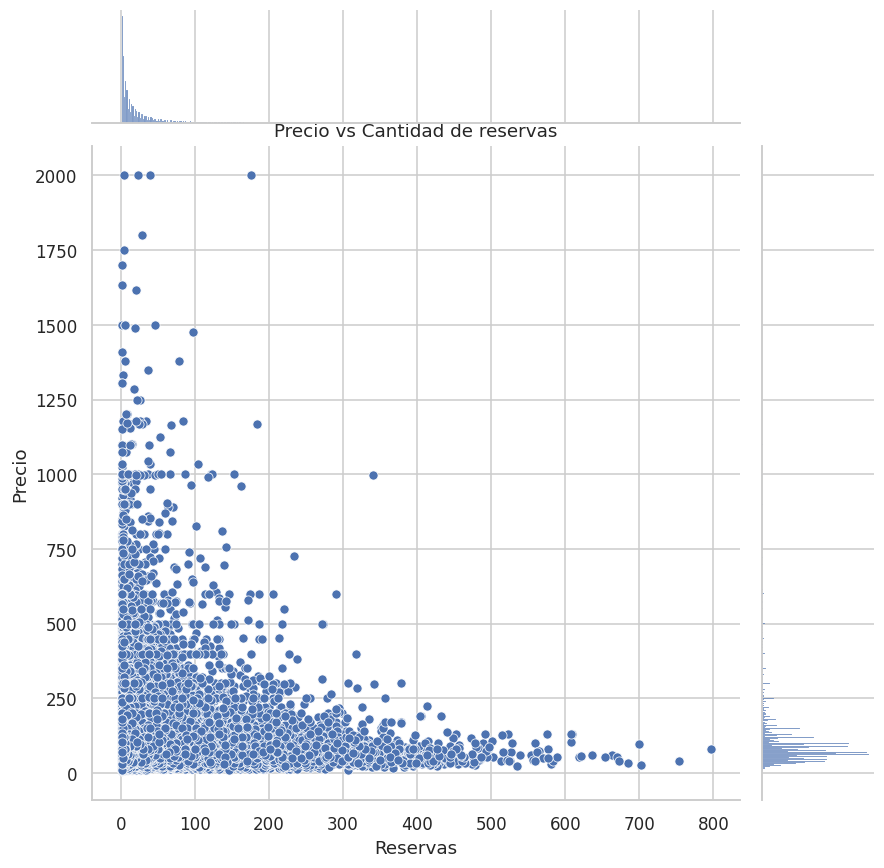

In [ ]:
ax = sns.jointplot(x ='review_counts',
              y ='price',
              data = df_listings,
              kind = 'scatter',
              height=8);


ax.ax_joint.set_title("Precio vs Cantidad de reservas")
ax.ax_joint.set_xlabel("Reservas")
ax.ax_joint.set_ylabel("Precio");

## 3.2. Amenities (Comodidades)

### 3.2.1 Amenities entorno a los precios y cantidad

>Se hára un análsis de los precios respecto a las comidades ofrecias en cada **listing_id**, permitiendo de esta forma ver entorno al precios las comidades más importantes y los que estas influyen en el mismo.

#### 3.2.1.1 Amenities vs Price

In [ ]:
amenities_price=df_listings['price'].value_counts().sort_values(ascending=False)[:10]

In [ ]:
amenities_price

60     2905
50     2723
70     2714
80     2567
100    2094
90     2059
65     1866
75     1678
40     1615
55     1593
Name: price, dtype: int64

Indices de los precios con mayor frecuencia

In [ ]:
repitive_prices=np.array(amenities_price.index)

In [ ]:
repitive_prices

array([ 60,  50,  70,  80, 100,  90,  65,  75,  40,  55])

Se hará la creación de nuevo DataFrame, en el que solo se tendrá en cuentas los **listing_id** que tenga unos de los precios con mayor frecuencia en el array **repitive_prices**

In [ ]:
df_amenities_price=pd.DataFrame()
for i in amenities_price.index:
  df_each_listing=df_listings.loc[(df_listings['price']==i)]
  df_amenities_price = df_amenities_price.append(df_each_listing, ignore_index=True)
  df_each_listing=pd.DataFrame()

<ipython-input-633-9ceb3fbbb78c>:4: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
df_amenities_price.head()

listing_id   host_id  ... review_scores_value review_counts
0     4823489  24837558  ...            10.00000       1.00000
1     7995091  35014275  ...            10.00000       1.00000
2    13838085   6848400  ...            10.00000       5.00000
3    17680112   2439549  ...            10.00000       5.00000
4    17843771  29885525  ...            10.00000      10.00000

[5 rows x 28 columns]

Las comidades (amenities) disponibles que se presentan en los datos desde Airbnb, presentan múltiples datos diferentes en forma de array en fomato JSON, por lo que se cambiará como una lista para trabajar de mejor forma.

In [ ]:
def List(x):
  phrase_to_list = x.split(",")
  for i in range(0,len(phrase_to_list),1):
    phrase_to_list[i]=phrase_to_list[i].replace('[', '')
    phrase_to_list[i]=phrase_to_list[i].replace('"', '')
    phrase_to_list[i]=phrase_to_list[i].replace(']', '')
  return phrase_to_list

In [ ]:
df_amenities_prices_total=pd.DataFrame()

for l in amenities_price.index:
  amen =pd.DataFrame(df_amenities_price.loc[(df_amenities_price['price'] == l)])
  amen['amen_as_list'] = amen['amenities'].apply(List)
  amenities = {}
  for i in amen['amen_as_list'].index:
      for j in range(len(amen['amen_as_list'][i])):
          if(amen['amen_as_list'][i][j] not in amenities):
              amenities[(amen['amen_as_list'][i][j])] = 1
          else:
              amenities[(amen['amen_as_list'][i][j])] += 1
  new_amen = sorted(amenities.items(), key = lambda x: x[1])[-10:]
  df_amenities_prices=pd.DataFrame(new_amen)
  df_amenities_prices[2] = l
  df_amenities_prices_total=df_amenities_prices_total.append(df_amenities_prices, ignore_index=True)
  df_amenities_prices=pd.DataFrame()

<ipython-input-636-c430cabb11d2>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-636-c430cabb11d2>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-636-c430cabb11d2>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-636-c430cabb11d2>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-636-c430cabb11d2>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-636-c430cabb11d2>:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future versi

In [ ]:
df_amenities_prices_total.columns = ['Amenitie', 'Amount','Price']

In [ ]:
px.pie(
    df_amenities_prices_total,
    values='Amount',
    names='Amenitie',
    facet_col="Price",
    facet_col_wrap=5,
    facet_col_spacing=0.12,
    title='Amenities vs Price')

#### 3.2.1.2 Amenities vs Amount

>Se analizará las comidades respecto a sus cantidades entorno a lo precios más solicitada en Airbnb (según los datos), para así comprender y revisar las comidades que las personas más buscan o tienen en cuenta.

> A continuación en la siguiente gráfica por medio de un diagrama de bihgotes, el comportamiento de las diferentes comodidas, entorno a la cantidad de veces que aparece.

In [ ]:
px.box(
    df_amenities_prices_total,
    x="Amenitie",
    y="Amount",
    )

>Se observa que el wifi, cocina, elementos esenciales, es lo que más se debe tener en cuenta al momento de brindar una apartamento, casa o especio a arrendar en Airbnb, dado que es lo que más requieren las personas.

### 3.2.2 Amenities por ciudades

#### 3.2.2.1 Amenities con respecto a Paris

La idea es revisar las comidades que más se tienen en cuenta en la ciudad de Paris, para así poder brindar la mejor información de lo que una persona que piensa arrendar debe tener en cuenta.

In [ ]:
amen =pd.DataFrame(df_listings.loc[(df_listings['city'] == 'Paris')]['amenities'])
amen['amen_as_list'] = amen['amenities'].apply(List)

>Separación de las amenities de forma individual, contando la cantidad de veces que aparece, para más adelante seleccionar los más solicitados o que se debe tener en cuenta en una vivienda en Airbnb

In [ ]:
amenities = {}

for i in amen['amen_as_list'].index:
    for j in range(len(amen['amen_as_list'][i])):
        if(amen['amen_as_list'][i][j] not in amenities):
            amenities[(amen['amen_as_list'][i][j])] = 1
        else:
            amenities[(amen['amen_as_list'][i][j])] += 1

>**Ordenar** los amenities

In [ ]:
new_amen = sorted(amenities.items(), key = lambda x: x[1])

>Diccionario que guardará las amenities que más se repiten y tienen un valor más alto

In [ ]:
newDict = []
for i in range(len(new_amen)-1,len(new_amen)-11,-1):
  newDict.append(new_amen[i][0])
newDict

[' Wifi',
 ' Kitchen',
 ' Essentials',
 ' Heating',
 ' Long term stays allowed',
 ' Washer',
 ' Hangers',
 ' Smoke alarm',
 ' Hair dryer',
 ' Dedicated workspace']

>Se hará una comparación en relación a la columna **review_scores_rating**, entorno a las 10 comidades que más se repiten y tienen más cantidad, para constrastar sí esto hace que se tenga un mejor score y además, revisar como se comporta en este caso para la ciudad de Paris

>Se hará una comparación en relación a la columna **review_scores_rating**, entorno a las 10 comidades que más se repiten y tienen más cantidad, para constrastar sí esto hace que se tenga un mejor score y además, revisar como se comporta en este caso para la ciudad de Paris

In [ ]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']

>Agregar una columna con los amenities con mayor valores

In [ ]:
for i in newDict:
    dnew[i] = 0

dnew

scores   Wifi  ...   Hair dryer   Dedicated workspace
0     100.00000      0  ...            0                     0
1     100.00000      0  ...            0                     0
2     100.00000      0  ...            0                     0
3     100.00000      0  ...            0                     0
4     100.00000      0  ...            0                     0
...         ...    ...  ...          ...                   ...
92332 100.00000      0  ...            0                     0
92333 100.00000      0  ...            0                     0
92334 100.00000      0  ...            0                     0
92335 100.00000      0  ...            0                     0
92336 100.00000      0  ...            0                     0

[61344 rows x 11 columns]

>Revisar por **listing_id** si cumple con los amenities con más cantidad

In [ ]:
for i in amen['amen_as_list'].index:
    # print(amen['amen_as_list'][i])
    for j in range(len(amen['amen_as_list'][i])):
        if amen['amen_as_list'][i][j] in newDict:
          dnew.loc[dnew.index==i,amen['amen_as_list'][i][j]]=1
dnew

scores   Wifi  ...   Hair dryer   Dedicated workspace
0     100.00000      1  ...            0                     0
1     100.00000      1  ...            0                     0
2     100.00000      1  ...            0                     0
3     100.00000      1  ...            0                     0
4     100.00000      1  ...            1                     0
...         ...    ...  ...          ...                   ...
92332 100.00000      1  ...            0                     1
92333 100.00000      1  ...            1                     0
92334 100.00000      1  ...            1                     1
92335 100.00000      1  ...            0                     1
92336 100.00000      1  ...            0                     1

[61344 rows x 11 columns]

>Revisar en una gráfica de barras la contribución de cada amenitie para la obtención de un buen score

In [ ]:
X=dnew.mean()
X=X.drop('scores')
X=X*100

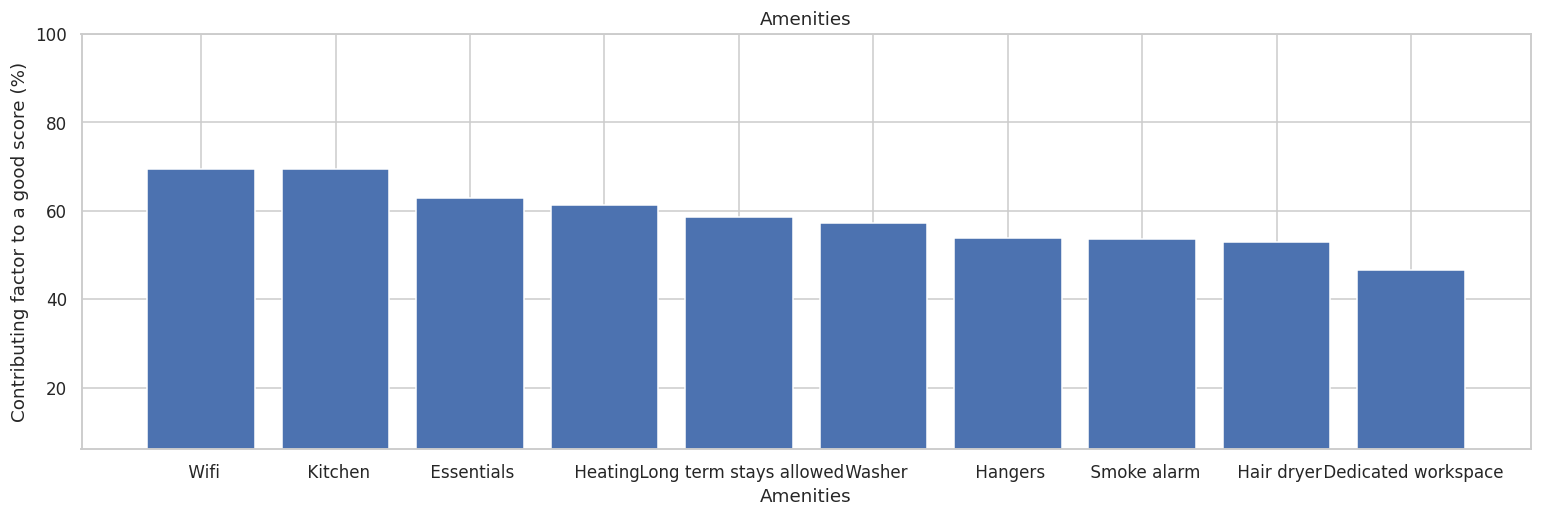

In [ ]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,100)
plt.bar(newDict, X)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score (%)')
plt.title('Amenities')
plt.show()

In [ ]:
df_new_amen_paris=pd.DataFrame.from_dict(new_amen[-10:])
df_new_amen_paris.columns=["amename",'amount']
df_new_amen_paris

px.pie(df_new_amen_paris, # DataFrame. Dataset de propinas "amenities by paris".
       names = 'amename',    # Categorías usadas para distinguir cada sección. (amenitie)
       values = 'amount',   # Valores representados por cada sección a partir del tamaño del ángulo. (Total de amenitie)
       hole = 0       # Proporción del agujero del centro.
       )

>Se puede observar que el wifi y la cocina, son las principales comidades al momento de arrendar en la ciudad de Paris. Por otro lado lo que menos buscan las personas es espacios de trabajo dedicados, esto puede ser por cuestiones de que Paris es una ciudad más que todo turística y las personas buscan más salir.

#### 3.2.2.2 Amenities con respecto a Roma

>La idea es revisar las comidades que más se tienen en cuenta en la ciudad de Roma, para así poder brindar la mejor información de lo que una persona que piensa arrendar debe tener en cuenta.

In [ ]:
amen =pd.DataFrame(df_listings.loc[(df_listings['city'] == 'Rome')]['amenities'])
amen['amen_as_list'] = amen['amenities'].apply(List)

>Separación de las amenities de forma individual, contando la cantidad de veces que aparece, para más adelante seleccionar los más solicitados o que se debe tener en cuenta en una vivienda en Airbnb

In [ ]:
amenities = {}

for i in amen['amen_as_list'].index:
    for j in range(len(amen['amen_as_list'][i])):
        if(amen['amen_as_list'][i][j] not in amenities):
            amenities[(amen['amen_as_list'][i][j])] = 1
        else:
            amenities[(amen['amen_as_list'][i][j])] += 1

>**Ordenar** los amenities

In [ ]:
new_amen = sorted(amenities.items(), key = lambda x: x[1])

>Diccionario que guardará las amenities que más se repiten y tienen un valor más alto

In [ ]:
newDict = []
for i in range(len(new_amen)-1,len(new_amen)-11,-1):
  newDict.append(new_amen[i][0])
newDict

[' Heating',
 ' Wifi',
 ' Essentials',
 ' Hair dryer',
 ' Long term stays allowed',
 ' Kitchen',
 ' TV',
 ' Hangers',
 ' Iron',
 ' Air conditioning']

>Se hará una comparación en relación a la columna **review_scores_rating**, entorno a las 10 comidades que más se repiten y tienen más cantidad, para constrastar sí esto hace que se tenga un mejor score y además, revisar como se comporta en este caso para la ciudad de Paris

>Se hará una comparación en relación a la columna **review_scores_rating**, entorno a las 10 comidades que más se repiten y tienen más cantidad, para constrastar sí esto hace que se tenga un mejor score y además, revisar como se comporta en este caso para la ciudad de Paris

In [ ]:
dnew = pd.DataFrame()
dnew['scores'] = df_listings['review_scores_rating']

>Agregar una columna con los amenities con mayor valores

In [ ]:
for i in newDict:
    dnew[i] = 0

dnew

scores   Heating   Wifi  ...   Hangers   Iron   Air conditioning
0     100.00000         0      0  ...         0      0                  0
1     100.00000         0      0  ...         0      0                  0
2     100.00000         0      0  ...         0      0                  0
3     100.00000         0      0  ...         0      0                  0
4     100.00000         0      0  ...         0      0                  0
...         ...       ...    ...  ...       ...    ...                ...
92332 100.00000         0      0  ...         0      0                  0
92333 100.00000         0      0  ...         0      0                  0
92334 100.00000         0      0  ...         0      0                  0
92335 100.00000         0      0  ...         0      0                  0
92336 100.00000         0      0  ...         0      0                  0

[61344 rows x 11 columns]

>Revisar por **listing_id** si cumple con los amenities con más cantidad

In [ ]:
for i in amen['amen_as_list'].index:
    # print(amen['amen_as_list'][i])
    for j in range(len(amen['amen_as_list'][i])):
        if amen['amen_as_list'][i][j] in newDict:
          dnew.loc[dnew.index==i,amen['amen_as_list'][i][j]]=1
dnew

scores   Heating   Wifi  ...   Hangers   Iron   Air conditioning
0     100.00000         0      0  ...         0      0                  0
1     100.00000         0      0  ...         0      0                  0
2     100.00000         0      0  ...         0      0                  0
3     100.00000         0      0  ...         0      0                  0
4     100.00000         0      0  ...         0      0                  0
...         ...       ...    ...  ...       ...    ...                ...
92332 100.00000         0      0  ...         0      0                  0
92333 100.00000         0      0  ...         0      0                  0
92334 100.00000         0      0  ...         0      0                  0
92335 100.00000         0      0  ...         0      0                  0
92336 100.00000         0      0  ...         0      0                  0

[61344 rows x 11 columns]

>Revisar en una gráfica de barras la contribución de cada amenitie para la obtención de un buen score

In [ ]:
X=dnew.mean()
X=X.drop('scores')
X=X*100

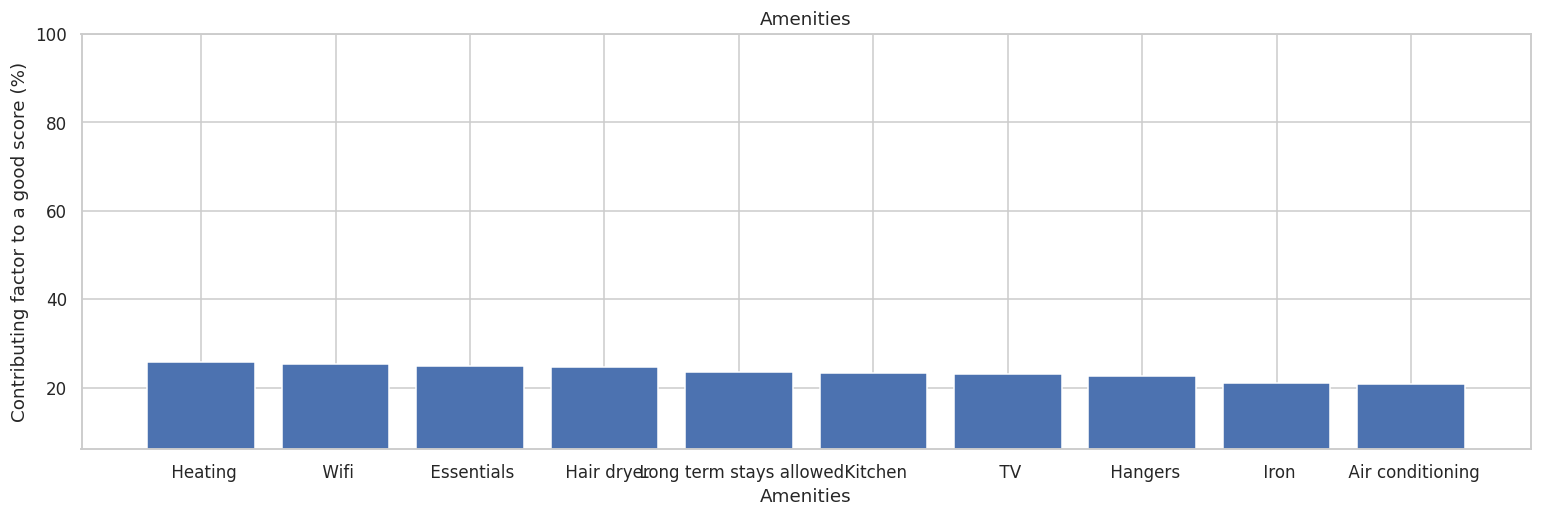

In [ ]:
fig = plt.figure(figsize=(17, 5))
plt.ylim(6,100)
plt.bar(newDict, X)
plt.xlabel('Amenities')
plt.ylabel('Contributing factor to a good score (%)')
plt.title('Amenities')
plt.show()

In [ ]:
df_new_amen_rome=pd.DataFrame.from_dict(new_amen[-10:])
df_new_amen_rome.columns=["amename",'amount']
df_new_amen_rome

px.pie(df_new_amen_rome, # DataFrame. Dataset de propinas "amenities by paris".
       names = 'amename',    # Categorías usadas para distinguir cada sección. (amenitie)
       values = 'amount',   # Valores representados por cada sección a partir del tamaño del ángulo. (Total de amenitie)
       hole = 0       # Proporción del agujero del centro.
       )

>Se puede observar que el wifi y la calefacción, son las principales comidades al momento de arrendar en la ciudad de Roma. Por otro lado lo que menos buscan las personas es una espacio para planchar.

#### 3.2.2.3 **Comparación ciudades**

In [ ]:
df_new_amen_rome['city']='Rome'
df_new_amen_paris['city']='Paris'
df_all_rows = pd.concat([df_new_amen_rome, df_new_amen_paris])
df_all_rows

amename  amount   city
0          Air conditioning   12722   Rome
1                      Iron   12863   Rome
2                   Hangers   13830   Rome
3                        TV   14121   Rome
4                   Kitchen   14299   Rome
5   Long term stays allowed   14433   Rome
6                Hair dryer   15056   Rome
7                Essentials   15253   Rome
8                      Wifi   15589   Rome
9                   Heating   15753   Rome
0       Dedicated workspace   28637  Paris
1                Hair dryer   32424  Paris
2               Smoke alarm   32956  Paris
3                   Hangers   32972  Paris
4                    Washer   35100  Paris
5   Long term stays allowed   35911  Paris
6                   Heating   37668  Paris
7                Essentials   38553  Paris
8                   Kitchen   42554  Paris
9                      Wifi   42586  Paris

In [ ]:
px.sunburst(df_all_rows,
            # Lista con el orden (hacia afuera) de las variables categóricas a codificar:
            path=['amename', 'city'],
            values='amount' # Valor a codificar.
            )

>Se puede observar las comidades entre las ciudades seleccionadas, en donde en ocasiones comparten y se muestran las tendencias, para así dar una mejor de referencia de lo más solicitado o que se tiene en cuenta tanto en parís como en roma.

### 3.2.3 Amenities en relación a la cantidad de reviews

>Se  hará una revisión en cuanto al número de vistas por **listing_id**, para revisar las comidades que las personas más tienen en cuenta, dado que existe la posibilidad de que hayan repetido lugar o recomienden a otras personas, siendo así que tiene mayor número de visitas.

In [ ]:
reviews_count = df_reviews.value_counts('listing_id').sort_values(ascending=False)[:10]

>Se seleccionarán los 10 **listing_id** con mayor número de reviews

In [ ]:
reviews_count

listing_id
17222007    891
8637229     828
1249964     796
32011332    762
2399029     754
32678719    753
470817      717
24745583    710
865289      702
162163      700
dtype: int64

>**Merge** entre los datos anteriormente obtenidos con el dataset listings

In [ ]:
reviews_count.name = 'review_counts'
df_amenities_reviews = pd.merge(df_listings, reviews_count, on='listing_id',how='left')

In [ ]:
df_amenities_reviews['amen_as_list'] = df_amenities_reviews['amenities'].apply(List)

>Conteo de las comodidades

In [ ]:
amenities = {}

for i in amen['amen_as_list'].index:
    for j in range(len(amen['amen_as_list'][i])):
        if(amen['amen_as_list'][i][j] not in amenities):
            amenities[(amen['amen_as_list'][i][j])] = 1
        else:
            amenities[(amen['amen_as_list'][i][j])] += 1

In [ ]:
sorted_dict = dict(sorted(amenities.items(),reverse=True, key=lambda item: item[1]))
amenities_reviews=pd.DataFrame(sorted_dict.items())[:10]

In [ ]:
amenities_reviews.columns=['Amenitie', 'Amount']

In [ ]:
amenities_reviews

Amenitie  Amount
0                   Heating   15753
1                      Wifi   15589
2                Essentials   15253
3                Hair dryer   15056
4   Long term stays allowed   14433
5                   Kitchen   14299
6                        TV   14121
7                   Hangers   13830
8                      Iron   12863
9          Air conditioning   12722

<Axes: xlabel='Amount', ylabel='Amenitie'>

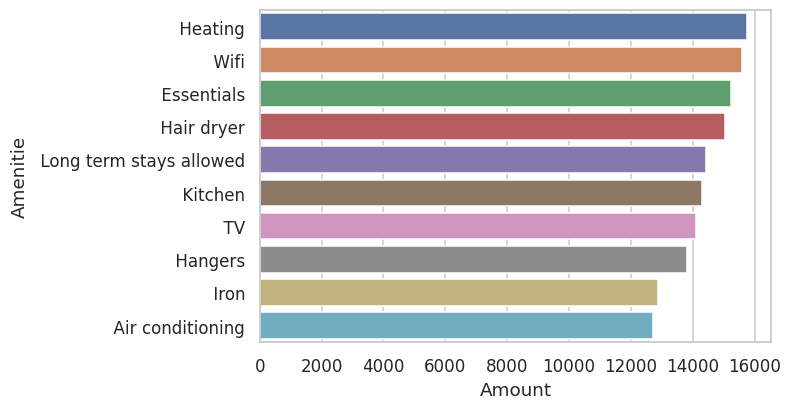

In [ ]:
sns.barplot(x="Amount", y="Amenitie", data=amenities_reviews,orient='horizonal')

>Se puede ver en la gráfica anterior, que la parte de calefacción, wifi, elementos esenciales, son los que tienen mayor frecuencia, denotando así que estas tres comidades son las que una persona que arrendará debe tener en cuenta para brindar una mejor experiencia.

## 3.3. Número de reservas en Airbnb desde 2008 hasta 2021

>En el siguiente conjunto de datos se muestran el número de reservas realizadas, lo que permite analizar las tendencias tanto a nivel anual como mensual.

Funciones para obtener el mes y año de las fechas

In [ ]:
def get_month_function(date):
  return int(str(date).split('-')[1])
def get_year_function(date):
  return int(str(date).split('-')[0])
df_merge = pd.merge(df_listings,df_reviews, on='listing_id')

In [ ]:
df_merge['reviews_per_month'] = df_merge['date'].apply(get_month_function)

###3.3.1 Relación por mes

Se presenta la relación entre el número de reservas por mes con el objetivo de determinar en qué época del año es mejor alquilar una vivienda. De acuerdo con los datos obtenidos, se puede concluir lo siguiente:

1. En París, se observa un mayor número de reservas durante los meses de verano, lo que sugiere que este es un período de alta demanda para alquilar una vivienda en la ciudad.
2. En Roma, se observa un mayor número de reservas durante los meses de primavera y verano, lo que indica que estos períodos también son de alta demanda para alquilar una vivienda en la ciudad.



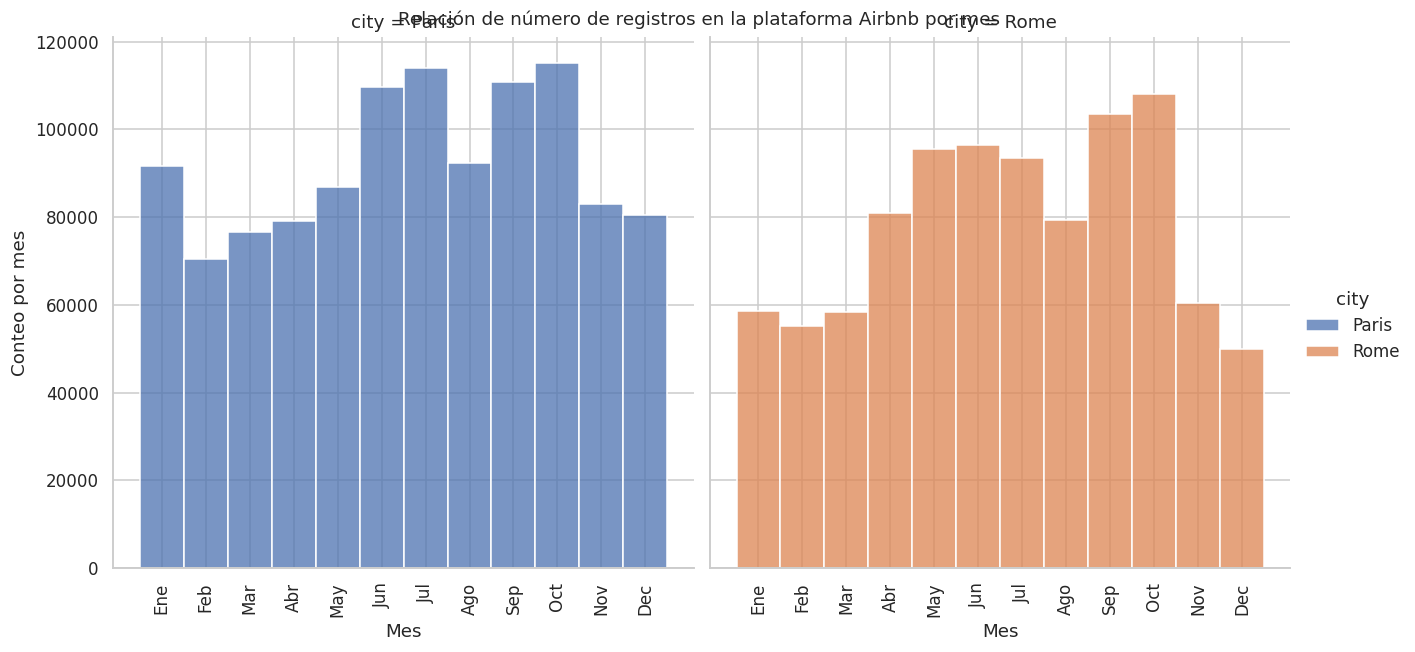

In [ ]:
hist_per_month_review_split = sns.FacetGrid(df_merge, col="city",hue='city',height=6)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12])
hist_per_month_review_split.set_xticklabels(labels=['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Sep','Oct','Nov','Dec'])
hist_per_month_review_split.tick_params(axis='x', rotation=90)
hist_per_month_review_split = hist_per_month_review_split.map_dataframe(sns.histplot, x= "reviews_per_month", discrete=True)
hist_per_month_review_split.add_legend()
hist_per_month_review_split.fig.suptitle('Relación de número de registros en la plataforma Airbnb por mes')
hist_per_month_review_split.set_axis_labels('Mes','Conteo por mes',)

###3.3.2 Relación por año

La relación presentada a continuación muestra el número de reservas realizadas por año. De acuerdo con los datos obtenidos, se puede concluir lo siguiente:

1. Para ambas ciudades, se observa un crecimiento acelerado del número de reservas entre los años 2011 y 2015, lo que sugiere un aumento en la demanda de alquiler de viviendas en ese período.
2. Se observa un descenso en el número de reservas entre los años 2019 y 2020, lo que podría ser resultado de la pandemia del coronavirus y las restricciones de viaje que se implementaron durante ese tiempo.
3. No se puede evaluar la tendencia después del 2022 ya que el dataset solo contiene datos hasta febrero de 2021.


In [ ]:
df_listings['host_since_year'] = df_listings['host_since'].apply(get_year_function)

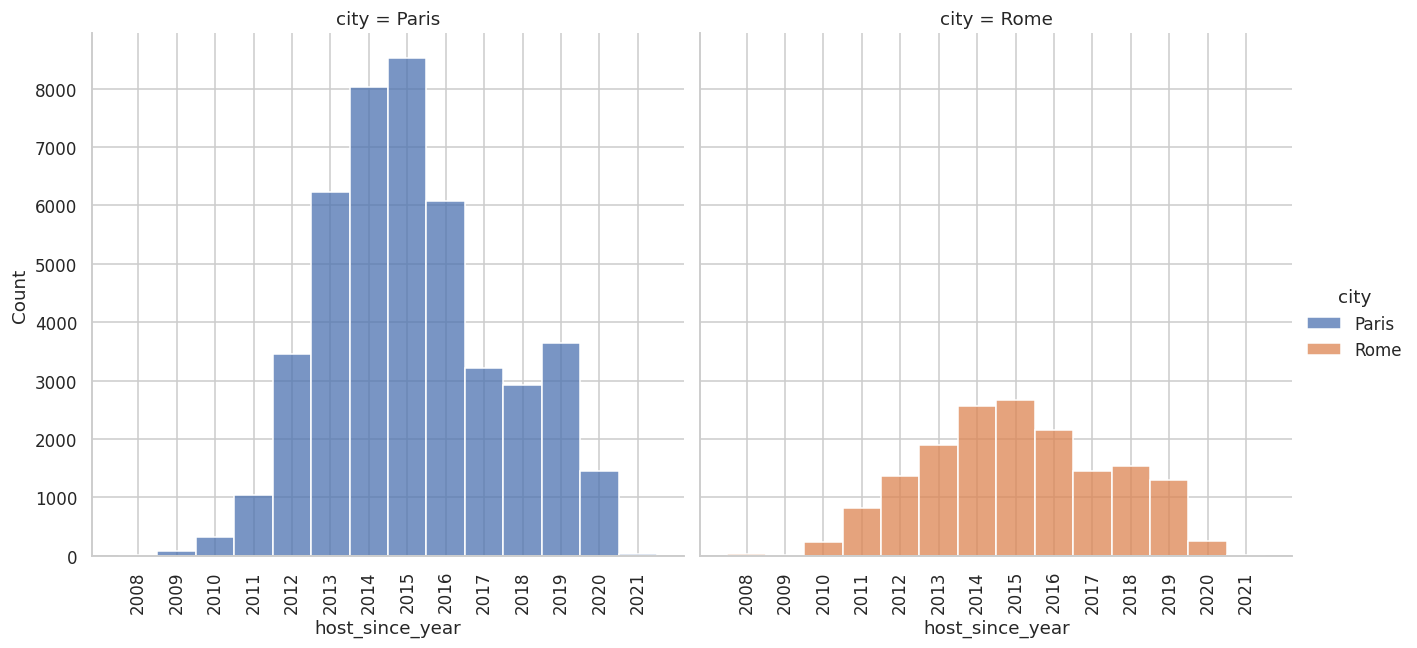

In [ ]:
hist_per_year_review_split = sns.FacetGrid(df_listings, col="city",hue='city',height=6)
plt.xticks([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021])
hist_per_year_review_split.tick_params(axis='x', rotation=90)
hist_per_year_review_split = hist_per_year_review_split.map_dataframe(sns.histplot, x= "host_since_year", discrete=True)
hist_per_year_review_split.add_legend()

##3.4. Ubicación de las viviendas

### 3.4.1 ¿Cuál es la ciudad idonea y tipo vivienda para alquilar en Europa?



Para iniciar el análisis de viviendas alquiladas en nuestro dataset, se presenta la lista del número de viviendas por tipo. De acuerdo con los datos obtenidos, se tienen dos tipos:

* *Entire Place* - Este tipo corresponde a una vivienda completa que se ofrece para alquilar a los huéspedes.
** Private Room* - Este tipo corresponde a una habitación privada dentro de una vivienda que se ofrece para alquilar a los huéspedes.






A continuación se presenta una gráfica de barras que muestra el número de viviendas disponibles para alquilar por ciudad, filtrando por tipo de vivienda.

Según la gráfica, se observa que el número de viviendas completas (Entire Place) es mayor en comparación con el número de habitaciones privadas (Private Room).

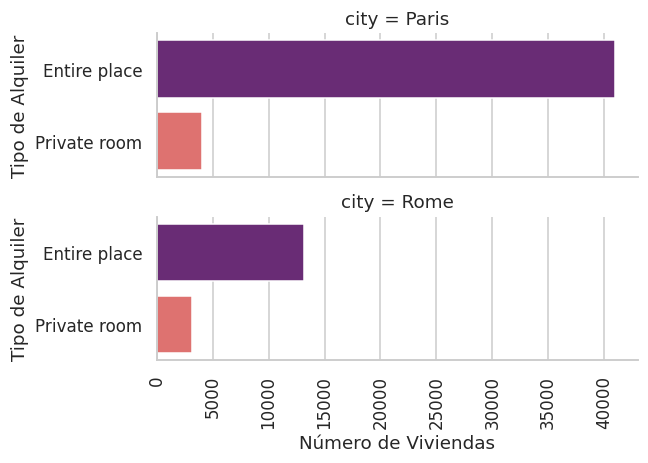

In [ ]:
plot_room_type_per_city_count = sns.FacetGrid(df_listings,row='city',height=2,aspect=3)
plot_room_type_per_city_count = plot_room_type_per_city_count.map_dataframe(sns.barplot, x='review_counts',
            estimator='count',
            y='room_type',
            palette='magma',
            errorbar=None)
plot_room_type_per_city_count.set_axis_labels("Número de Viviendas",'Tipo de Alquiler')
plot_room_type_per_city_count.tick_params(axis='x', rotation=90)

Se realizó la suma del número de veces que se ha alquilado una vivienda por ciudad y por tipo de alquiler. Según los datos obtenidos, se puede concluir que los usuarios prefieren alquilar un apartamento completo (Entire Place) por encima de un cuarto privado (Private Room).

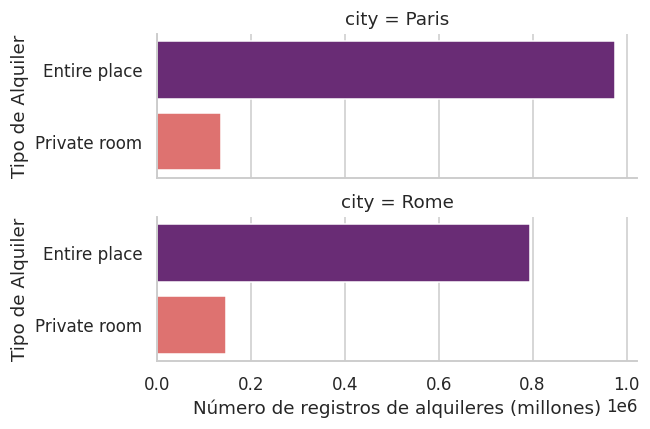

In [ ]:
plot_room_type_per_city_sum = sns.FacetGrid(df_listings,row='city',height=2,aspect=3)
plot_room_type_per_city_sum = plot_room_type_per_city_sum.map_dataframe(sns.barplot, x='review_counts',
            estimator='sum',
            y='room_type',
            palette='magma',
            errorbar=None)
plot_room_type_per_city_sum.set_axis_labels("Número de registros de alquileres (millones)",'Tipo de Alquiler')

Se realizó el promedio del número de veces que se ha alquilado una vivienda por ciudad y por tipo de alquiler. Según los datos obtenidos, se observa un mayor promedio de número de alquileres por vivienda para la ciudad de Roma. Además, se observa que el promedio de alquileres por lugar completo (Entire Place) es mayor que el promedio de alquileres por cuarto privado (Private Room).

Por lo tanto, se puede concluir que en Roma existe una mayor demanda de viviendas para alquilar y que los usuarios prefieren alquilar un lugar completo en lugar de un cuarto privado.

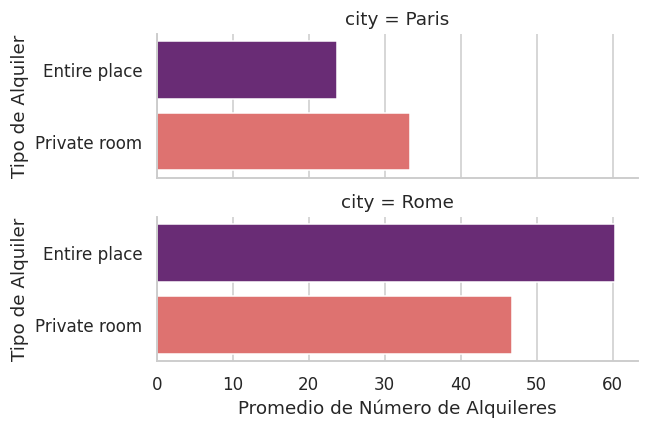

In [ ]:
plot_room_type_per_city_mean = sns.FacetGrid(df_listings,row='city',height=2,aspect=3)
plot_room_type_per_city_mean = plot_room_type_per_city_mean.map_dataframe(sns.barplot, x='review_counts',
            estimator='mean',
            y='room_type',
            palette='magma',
            errorbar=None)
plot_room_type_per_city_mean.set_axis_labels("Promedio de Número de Alquileres",'Tipo de Alquiler')

Es una buena idea realizar un estudio de precios por tipo de vivienda y ubicación antes de tomar la decisión de registrar una vivienda en Airbnb. De esta manera, se puede evaluar si por precio es mejor escoger una ciudad u otra.

Se recomienda realizar un análisis de precios comparando el precio de las viviendas completas y las habitaciones privadas en diferentes ubicaciones para poder tomar una decisión informada y adecuada. También se puede considerar el precio promedio de alquiler en cada ciudad para determinar cuál sería la opción más rentable.

>Es interesante observar que la gráfica denota una ligera ventaja en el promedio de costo de vivienda en París, tanto para la vivienda completa como para la habitación privada.

>Sin embargo, ¿es significativa esta diferencia?

>A continuación realizaremos un test de hipótesis para validar si existe alguna diferencia.


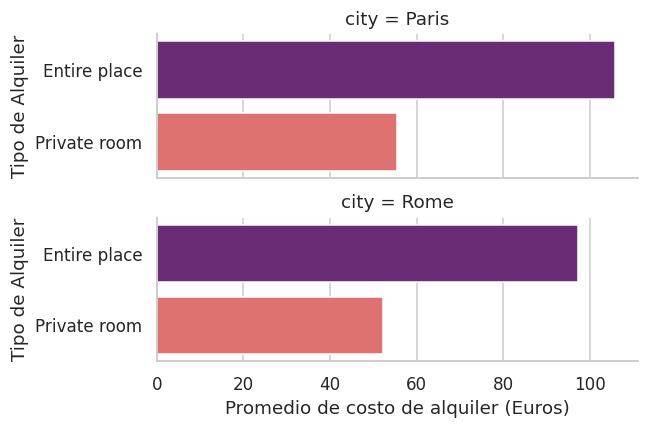

In [ ]:
plot_room_type_per_city_price_mean = sns.FacetGrid(df_listings,row='city',height=2,aspect=3)
plot_room_type_per_city_price_mean = plot_room_type_per_city_price_mean.map_dataframe(sns.barplot, x='price',
            estimator='mean',
            y='room_type',
            palette='magma',
            errorbar=None)
plot_room_type_per_city_price_mean.set_axis_labels("Promedio de costo de alquiler (Euros)",'Tipo de Alquiler')

>¿Es significativa la diferencia de media de costo de alquiler entre Roma y Paris?

>Para esta caso, se va a realizar la prueba Z ya que la muestra de cada uno de los grupos de datos es mayor a 30.

>Ahora, se desea validar si para cada tipo de vivienda que se alquila en Airbnb, existe una diferencia significativa en el costo de alquiler por cada una de las dos ciudades, ya que esto permitirá dar una certeza de que ciudad escoger para dejar una vivienda en alquiler.

>Se tiene lo siguiente:

>* Grupo 1: costo de alquiler de viviendas categorizadas por "Cuarto privado" en Roma
** *Tamaño grupo* =  3130
** *Promedio del grupo* = 52.12

>* Grupo 2: costo de alquiler de viviendas categorizadas por "Cuarto privado" en Paris
** *Tamaño grupo* = 4085
** *Promedio del grupo* = 55.49

>* Grupo 3: costo de alquiler de viviendas categorizadas por "Vivienda completa" en Roma
** *Tamaño grupo* = 13174
** *Promedio del grupo* = 97.10

>* Grupo 4: costo de alquiler de viviendas categorizadas por "Vivienda completa" en Paris
** *Tamaño grupo* = 40982
** *Promedio del grupo* = 105.75

>**Hipótesis**:

>* Hipótesis nula $H_0: \mu_1 = \mu_2$ ($\mu_1 - \mu_2 = 0$)
>* Hipótesis alternativa $H_a: \mu_1 \neq \mu_2$ ($\mu_1 - \mu_2 \neq 0$)

>**Grado de significancia**:

>* $\alpha = 5\% = 0.05$

>Primero se valida la normalidad de los datos

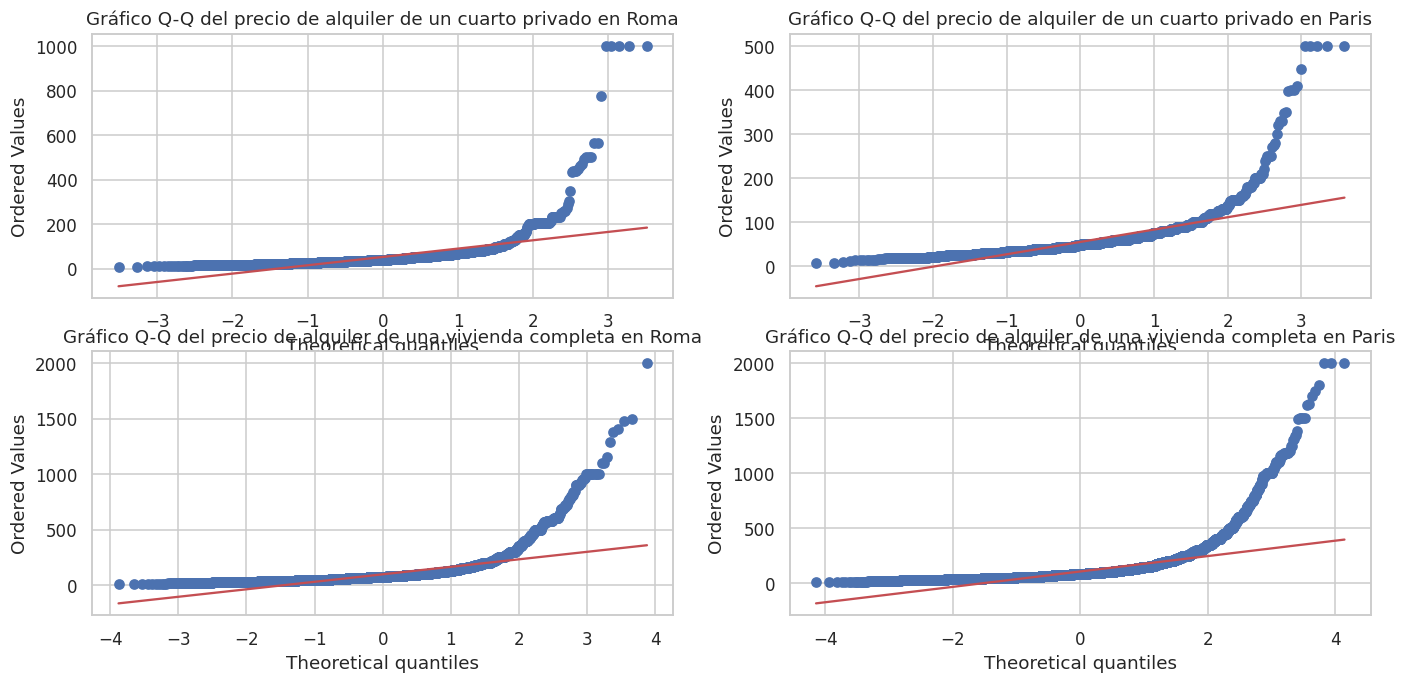

In [ ]:
fig_normal, axes_normal = plt.subplots(nrows=2, ncols=2,figsize=(15,7))

stats.probplot(df_listings[(df_listings['city']=='Rome') & (df_listings['room_type']=='Private room')]['price'], plot=axes_normal[0,0])
axes_normal[0,0].set_title('Gráfico Q-Q del precio de alquiler de un cuarto privado en Roma')
stats.probplot(df_listings[(df_listings['city']=='Paris') & (df_listings['room_type']=='Private room')]['price'], plot=axes_normal[0,1])
axes_normal[0,1].set_title('Gráfico Q-Q del precio de alquiler de un cuarto privado en Paris')
stats.probplot(df_listings[(df_listings['city']=='Rome') & (df_listings['room_type']=='Entire place')]['price'], plot=axes_normal[1,0])
axes_normal[1,0].set_title('Gráfico Q-Q del precio de alquiler de una vivienda completa en Roma')
stats.probplot(df_listings[(df_listings['city']=='Paris') & (df_listings['room_type']=='Entire place')]['price'], plot=axes_normal[1,1])
axes_normal[1,1].set_title('Gráfico Q-Q del precio de alquiler de una vivienda completa en Paris')
plt.show()
fig_normal.tight_layout()

>Debido a que los puntos no estan sobre la línea roja, se puede determinar una desviación de normalidad.
Por lo tanto, no se puede realizar un test de hipótesis para determinar si existe diferencia de precios en los alquileres de las viviendas por tipo y por ciudad.

### 3.4.2 ¿Cuál es el mejor barrio en Roma para alquilar una vivienda?

>A continuación se revisa el número de inmuebles en alquiler por barrio en Roma.

>Se puede denotar como existen un alto número de disponibles en alquiler en el Centro Storico, lo cuál tiene sentido al ser uno de los lugares más turísticos en Roma.

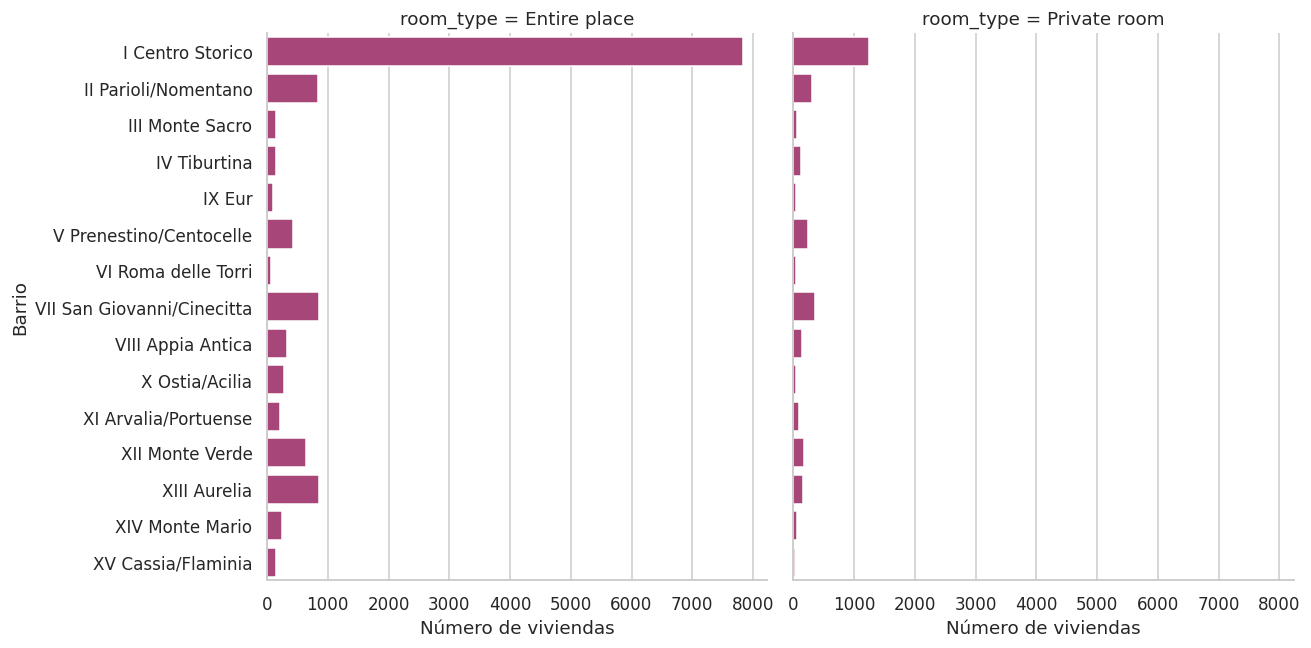

In [ ]:
no_listings_per_room_neighbourhood = sns.FacetGrid(df_listings[df_listings['city']=='Rome'].sort_values('neighbourhood'),col='room_type',height=6)
no_listings_per_room_neighbourhood = no_listings_per_room_neighbourhood.map_dataframe(sns.barplot, x='review_counts',
            y='neighbourhood',
            estimator='count',
            hue='room_type',
            palette='magma',
            errorbar=None)
no_listings_per_room_neighbourhood.set_axis_labels('Número de viviendas','Barrio')


>Ahora se valida el promedio de estancias de vivienda por barrio y por tipo de vivienda.
>A continuación se presenta el top 3 de barrios por tipo de vivienda:

>**Entire Place:**


>1.   I Centro Storico
>2.   VII Aurelia
>3.   XII San Giovanni / Cinecittà

>**Private Room:**


>1.   I Centro Storico
>2.   VII San Giovanni / Cinecittà
>3.   XII Monte Verde

>Predomina el favoritismo para el _Centro Storico_

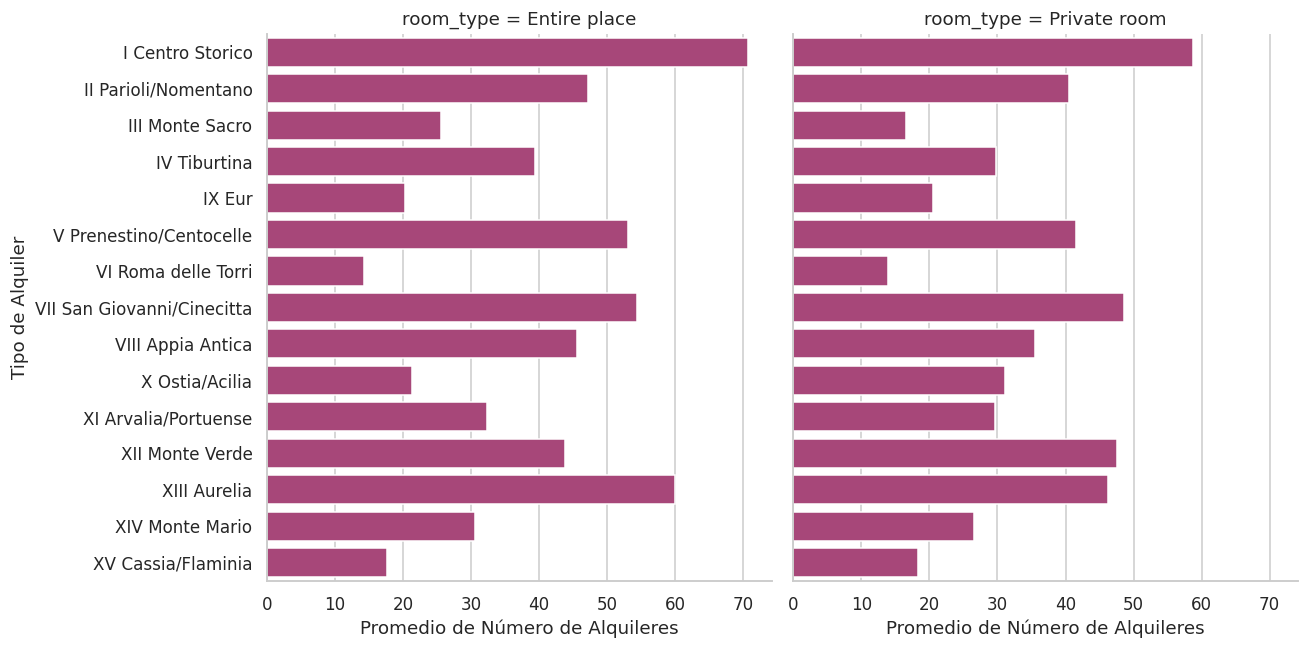

In [ ]:
avg_no_rvws_per_room_neighbourhood = sns.FacetGrid(df_listings[df_listings['city']=='Rome'].sort_values('neighbourhood'),col='room_type',height=6)
avg_no_rvws_per_room_neighbourhood = avg_no_rvws_per_room_neighbourhood.map_dataframe(sns.barplot, x='review_counts',
            y='neighbourhood',
            estimator='mean',
            hue='room_type',
            palette='magma',
            errorbar=None)


avg_no_rvws_per_room_neighbourhood.set_axis_labels("Promedio de Número de Alquileres",'Tipo de Alquiler')

Se muestra el promedio de costo de vivienda por barrio y por tipo de vivienda.
>A continuación se presenta el top 3 de barrios por tipo de vivienda:

>**Entire Place:**


>1.   I Centro Storico
>2.   II Parioli / Nomentano
>3.   VII Aurelia


>**Private Room:**


>1.   I Centro Storico
>2.   XV Cassia / Flaminia
>3.   XII Monte Verde

>De nuevo, predomina la ventaja para el _Centro Storico_ sobre los demás

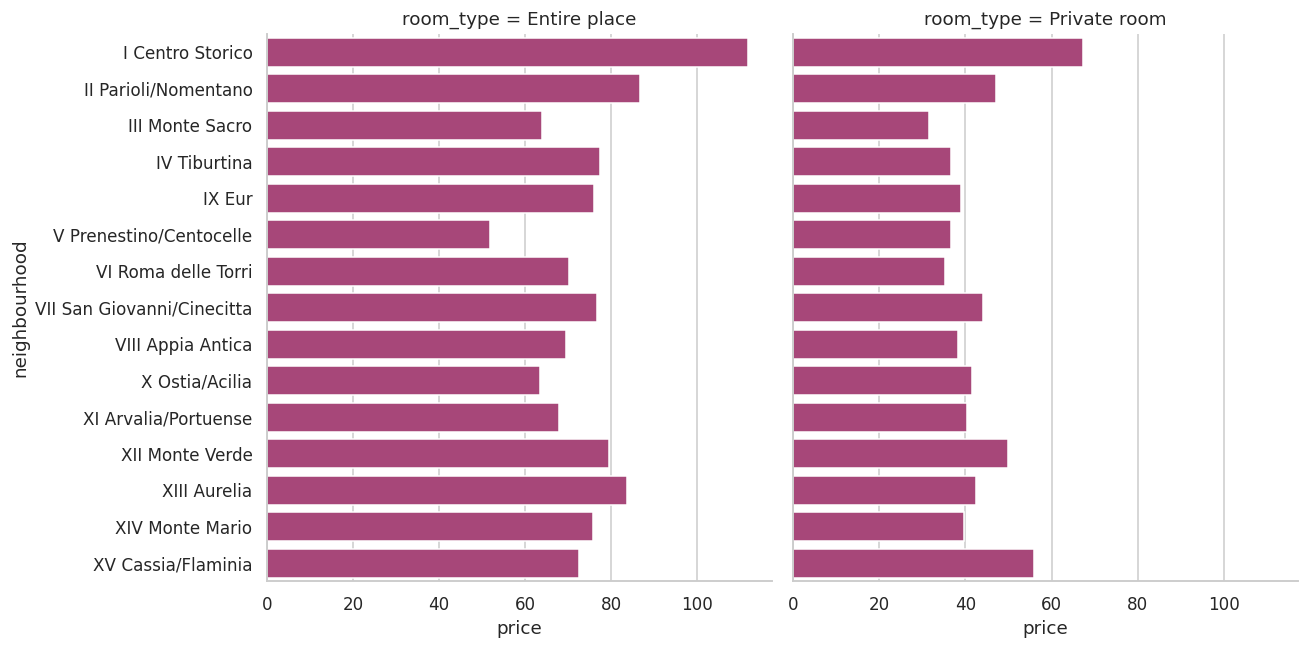

In [ ]:
avg_price_per_room_neighbourhood = sns.FacetGrid(df_listings[df_listings['city']=='Rome'].sort_values('neighbourhood'),col='room_type',height=6)
avg_price_per_room_neighbourhood = avg_price_per_room_neighbourhood.map_dataframe(sns.barplot, x='price',
            y='neighbourhood',
            estimator='mean',
            hue='room_type',
            palette='magma',
            errorbar=None)


>Para concluir se muestra una gráfica de dispersion con la posición de cada uno de los barrios con promedio de precio y de número de alquileres, donde predominan los concluidos anteriormente.

In [ ]:
scatter_per_neighbourhood_rome = df_listings.loc[(df_listings['city']=='Rome')].groupby(['neighbourhood','room_type']).mean()
scatter_per_neighbourhood_rome.index[0][0]
column_neighbourhood = []
column_type_room     = []
for index in range(0,len(scatter_per_neighbourhood_rome.index)):
  column_neighbourhood.append(scatter_per_neighbourhood_rome.index[index][0])
  column_type_room.append(scatter_per_neighbourhood_rome.index[index][1])
scatter_per_neighbourhood_rome['neighbourhood_name'] = column_neighbourhood
scatter_per_neighbourhood_rome['type_room_name'] = column_type_room

px.scatter(scatter_per_neighbourhood_rome,
                x='price',
                y='review_counts',
                color='neighbourhood_name',
                facet_col="type_room_name",
                labels = {'review_counts':'Promedio de alquileres por vivienda','price':'Promedio de precio por Barrio','neighbourhood_name':'Barrio'})

>**Como conclusión se puede sugerir qué, tanto _Centro Storico_ como _Aurelia_ son los dos mejores barrios para poner en alquiler una vivienda completa en Roma.**

###3.4.3 ¿Cuál es el mejor barrio en Paris para alquilar una vivienda?

>A continuación, se denota la gráfica filtrada por barrios y tipo de vivienda en Paris.

>En cuanto al número de alquileres, se observa mayoritariamente una preferencia en alquilar una vivienda completa sobre alquilar un cuarto privado.

>Se presenta el top 3 de barrios con más viviendas para alquilar en Paris.

>**Entire Place:**


>1.   Buttes-Montmartre
>2.   Popincourt
>3.   Enclos-St-Laurent


>**Private Room:**


>1.   Buttes-Montmartre
>2.   Popincourt
>3.   Buttes-Chaumont

>Por sí solos, estos datos muestran que existen más viviendas en estos barrios. Se validarán si estas zonas son más rentables o no.


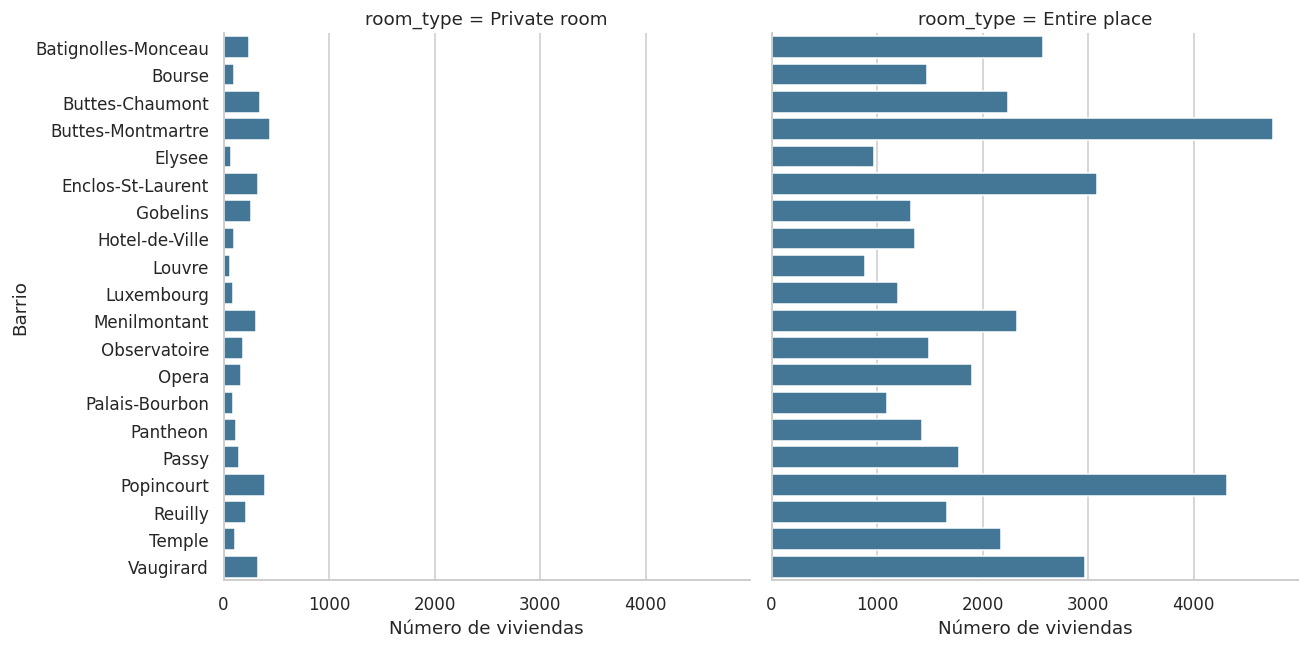

In [ ]:
no_listings_per_room_neighbourhood = sns.FacetGrid(df_listings[df_listings['city']=='Paris'].sort_values('neighbourhood'),col='room_type',height=6)
no_listings_per_room_neighbourhood = no_listings_per_room_neighbourhood.map_dataframe(sns.barplot, x='review_counts',
            y='neighbourhood',
            estimator='count',
            hue='room_type',
            palette='mako',
            errorbar=None)
no_listings_per_room_neighbourhood.set_axis_labels('Número de viviendas','Barrio')


>Ahora bien, se grafica el promedio de número de alquileres por barrio y por tipo de cuarto.

>Se presenta el top 3 de barrios con un promedio de número de alquileres más alto.

>**Entire Place:**


>1.   Louvre
>2.   Bourse
>3.   Hotel-de-Ville


>**Private Room:**


>1.   Louvre
>2.   Bourse
>3.   Hotel-de-Ville

>A diferencia del caso de Roma, los barrios mantienen el mismo orden sin importar el tipo de vivienda.

>Otro dato importante, es que ningun barrio que aparece en este top 3, se encuentra en el top 3 de mayor número de viviendas, por lo cuál se podría comenzar a descartar el top 3 hallado en la anterior gráfica.

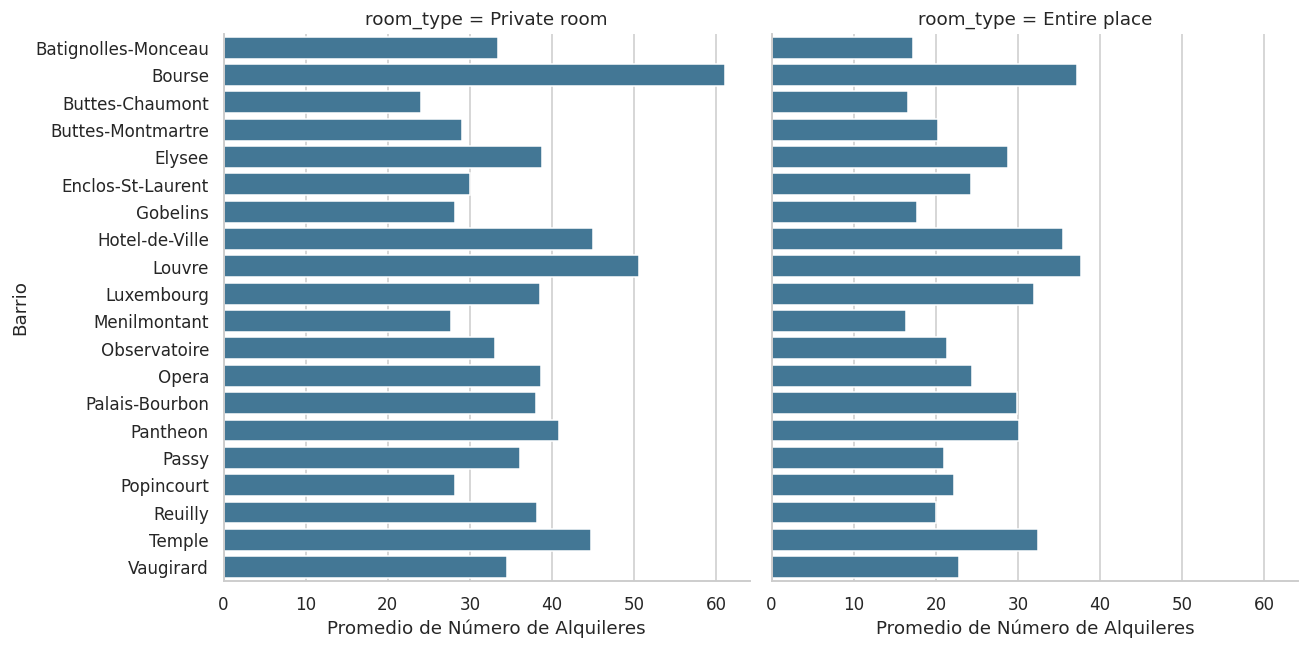

In [ ]:
avg_no_rvws_per_room_neighbourhood = sns.FacetGrid(df_listings[df_listings['city']=='Paris'].sort_values('neighbourhood'),col='room_type',height=6)
avg_no_rvws_per_room_neighbourhood = avg_no_rvws_per_room_neighbourhood.map_dataframe(sns.barplot, x='review_counts',
            y='neighbourhood',
            estimator='mean',
            hue='room_type',
            palette='mako',
            errorbar=None)


avg_no_rvws_per_room_neighbourhood.set_axis_labels("Promedio de Número de Alquileres",'Barrio')

>A continuación se muestra la media de costo de vivienda por barrio y por tipo de cuarto.

>Se presenta el top 3 de barrios con un promedio de costo más alto.

>**Entire Place:**


>1.   Elysee
>2.   Luxembourg
>3.   Louvre


>**Private Room:**


>1.   Louvre
>2.   Elysee
>3.   Luxembourg

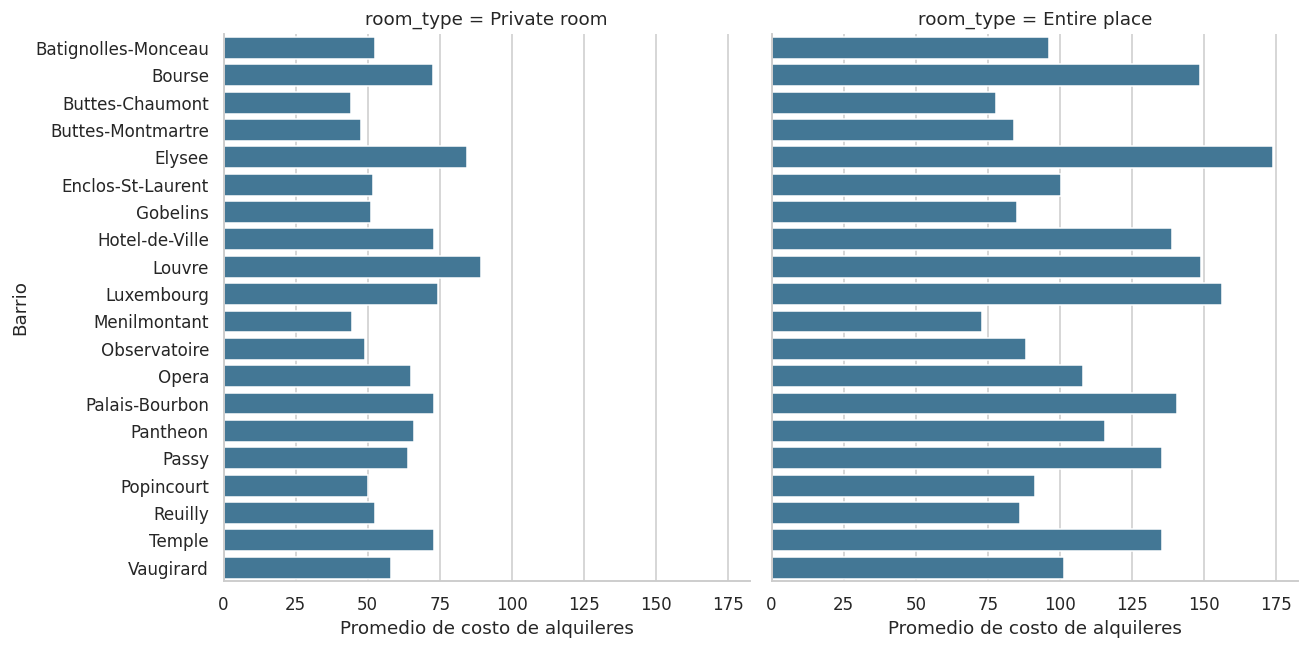

In [ ]:
avg_price_per_room_neighbourhood = sns.FacetGrid(df_listings[df_listings['city']=='Paris'].sort_values('neighbourhood'),col='room_type',height=6)
avg_price_per_room_neighbourhood = avg_price_per_room_neighbourhood.map_dataframe(sns.barplot, x='price',
            y='neighbourhood',
            estimator='mean',
            hue='room_type',
            palette='mako',
            errorbar=None)
avg_price_per_room_neighbourhood.set_axis_labels("Promedio de costo de alquileres",'Barrio')

>Los datos no son tan claros para el caso anterior, por lo que se va a realizar una gráfica de dispersión entre el promedio de número de alquileres y el promedio de precio por alquiler para observar qué barrio se encuentra mejor posicionado.



In [ ]:
scatter_per_neighbourhood_paris = df_listings.loc[(df_listings['city']=='Paris')].groupby(['neighbourhood','room_type']).mean()
scatter_per_neighbourhood_paris.index[0][0]
column_neighbourhood = []
column_type_room     = []
for index in range(0,len(scatter_per_neighbourhood_paris.index)):
  column_neighbourhood.append(scatter_per_neighbourhood_paris.index[index][0])
  column_type_room.append(scatter_per_neighbourhood_paris.index[index][1])
scatter_per_neighbourhood_paris['neighbourhood_name'] = column_neighbourhood
scatter_per_neighbourhood_paris['type_room_name'] = column_type_room

px.scatter(scatter_per_neighbourhood_paris,
                x='price',
                y='review_counts',
                color='neighbourhood_name',
                facet_col="type_room_name",
                labels = {'review_counts':'Promedio de alquileres por vivienda','price':'Promedio de precio por Barrio','neighbourhood_name':'Barrio'})

>**De acuerdo al resultado anterior, se puede dar conclusión que, tanto Bourse como Louvre son los barrios mejores posicionados para poner en alquiler una vivienda completa o cuarto privado en Paris.**

##3.5. Visualización en mapas de cada una de las viviendas en renta por ciudad y barrio.

>Se crea una función para realizar la traducción de los datos de la columna "room_type"

In [ ]:
def translate_type_room(x):
  if x == 'Entire place':
    return "Vivienda completa"
  else:
    return 'Habitación privada'
df_listings['type_room_spanish'] = df_listings['room_type'].apply(translate_type_room)

###3.5.1 Paris

>Se presenta el mapa de Paris, con los tres barrios están mejor posicionados para poner una vivienda en alquiler.
Se denotan las convenciones de la siguiente forma:


>*   Circulo con interior rojo - Barrio Bourse con cuarto privado
>*   Circulo sin interior rojo - Barrio Bourse con vivienda completa
>*   Circulo con interior azul - Barrio Louvre con cuarto privado
>*   Circulo sin interior azul - Barrio Louvre con vivienda completa
>*   Circulo con interior verde - Barrio Hotel-de-Ville con cuarto privado
>*   Circulo sin interior verde - Barrio Hotel-de-Ville con vivienda completa




In [ ]:
Par_lat_long = (48.8566, 2.3522)

map_paris = folium.Map(location=Par_lat_long,
 zoom_start=15)

callback_Bourse_room = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red", fillOpacity: 0,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Bourse_entire = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red", fillOpacity: 1,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Louvre_room = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "blue", fillOpacity: 0 ,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros <br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Louvre_entire = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "blue", fillOpacity: 1,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Hotel_de_Ville_room = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "green", fillOpacity: 0 , radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Hotel_de_Ville_entire = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "green", fillOpacity: 1,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')

map_paris.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='Bourse') & (df_listings['room_type']=='Entire place')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Bourse_entire))
map_paris.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='Bourse') & (df_listings['room_type']=='Private room')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Bourse_room))
map_paris.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='Louvre') & (df_listings['room_type']=='Entire place')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Louvre_entire))
map_paris.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='Louvre') & (df_listings['room_type']=='Private room')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Louvre_room))
map_paris.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='Hotel-de-Ville') & (df_listings['room_type']=='Entire place')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Hotel_de_Ville_entire))
map_paris.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='Hotel-de-Ville') & (df_listings['room_type']=='Private room')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Hotel_de_Ville_room))

###3.5.2 Roma

>Se presenta el mapa de Roma, con los tres barrios están mejor posicionados para poner una vivienda en alquiler.
>Se denotan las convenciones de la siguiente forma:


>*   Circulo con interior rojo - Barrio Centro Storico con cuarto privado
>*   Circulo sin interior rojo - Barrio Centro Storico con vivienda completa
>*   Circulo con interior azul - Barrio Aurelia con cuarto privado
>*   Circulo sin interior azul - Barrio Aurelia con vivienda completa
>*   Circulo con interior verde - Barrio Hotel-de-Ville con cuarto privado
>*   Circulo sin interior verde - Barrio Hotel-de-Ville con vivienda completa

In [ ]:
par_lat_long_rome = (41.888300, 12.4881900)

map_rome = folium.Map(location=par_lat_long_rome,
 zoom_start=15)

callback_Centro_room = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red", fillOpacity: 0,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Centro_entire = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "red", fillOpacity: 1,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Aurelia_room = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "blue", fillOpacity: 0 ,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Aurelia_entire = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "blue", fillOpacity: 1,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Parioli_room = ('function (row) {'
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "green", fillOpacity: 0 ,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')
callback_Parioli_entire = ('function (row) {'
                'var circle = L.circle(new L.LatLng(row[0], row[1]), {color: "green", fillOpacity: 1,  radius: 3});'
                "var popup = L.popup({maxWidth: '300'});"
                "const display_text = {text: row[2]};"
                "const display_text_2 = {text: row[3]};"
                "const display_text_3 = {text: row[4]};"
                "var mytext = $(`<div id='mytext' class='display_text' style='width: 100.0%; height: 100.0%;'> Barrio: ${display_text.text} <br></br> Costo: ${display_text_2.text} Euros<br></br> Tipo de Vivienda: ${display_text_3.text}</div>`)[0];"
                "popup.setContent(mytext);"
                "circle.bindPopup(popup);"
                'return circle};')

map_rome.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='I Centro Storico') & (df_listings['room_type']=='Entire place')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Centro_entire))
map_rome.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='I Centro Storico') & (df_listings['room_type']=='Private room')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Centro_room))
map_rome.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='XIII Aurelia') & (df_listings['room_type']=='Entire place')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Aurelia_entire))
map_rome.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='XIII Aurelia') & (df_listings['room_type']=='Private room')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Aurelia_room))
map_rome.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='II Parioli/Nomentano') & (df_listings['room_type']=='Entire place')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Parioli_entire))
map_rome.add_child(FastMarkerCluster(df_listings.loc[(df_listings['neighbourhood']=='II Parioli/Nomentano') & (df_listings['room_type']=='Private room')][['latitude', 'longitude','neighbourhood','price','type_room_spanish']].values.tolist(), callback=callback_Parioli_room))


#4. Conclusiones


1.   En general, se observa que las calificaciones positivas están relacionadas entre sí y asociadas con una mayor cantidad de reservas. Ser un superhost y tener una cuenta verificada también se asocian con calificaciones más altas y mayores reservas. El precio no parece tener una relación directa con las calificaciones, pero se observa que precios más bajos están asociados con más reservas. Tener una rápida atención influye en la cantidad de reservas.
2.   A modo de conclusión, en cuanto a las comodidades o servicios de las viviendas, se observó que en torno a los precios, lo que más destaca es contar con un buen servicio de internet (Wifi), una cocina y servicios esenciales. Esto no solo se reflejó en los precios, sino también en las ciudades, donde los elementos que recibieron mejores reseñas fueron los mencionados anteriormente. Sin embargo, no todos los elementos tuvieron la misma importancia en las ciudades de estudio, ya que se notó que París presentó una mayor frecuencia en estos aspectos, posiblemente debido a que es una ciudad más turística.
3.  Se puede afirmar que, al analizar los datos de ubicación de las viviendas en Airbnb, se puede observar una tendencia hacia la preferencia de alquilar viviendas completas en lugar de habitaciones privadas, lo cual puede ser de gran utilidad para los propietarios que deseen maximizar la rentabilidad de sus propiedades en la plataforma. Asimismo, el análisis de las cifras sugiere que Roma es una ubicación más rentable que Francia, dado que presenta un promedio de precio y de reservas por vivienda mayor. Sin embargo, es importante tener en cuenta que estos resultados son específicos del dataset utilizado y pueden variar en otros contextos o épocas.


